<font size = 6><b> Projet de fin d'étude:</b></font>


Etude de performances de x264, le convertisseur de vidéos

Résumé des résultats principaux


--

<font color="red" size = 5> Import des données</font>

Le script doit être placé dans x264-inputsensitivity-master, le fichier contenant les données, pour que l'import fonctionne.

Selon les os, les vidéos ne sont pas importées dans le même ordre, d'où la liste exhaustive des adresses dans l'import.

--

In [1]:
import os
import pandas

# on se crée une liste d'adresses disques contenant les vidéos
listeAdresse = ['./data/x264-1908-caire-wasm/x264-results1.csv',
 './data/x264-0408-deadline-wasm/x264-results1.csv',
 './data/x264-0308-news-wasm/x264-results1.csv',
 './data/x264-2108-forester-wasm/x264-results1.csv',
 './data/x264-0308-crowd_run-wasm/x264-results1.csv',
 './data/x264-1908-flower-wasm/x264-results1.csv',
 './data/x264-0308-mobilesif-wasm/x264-results1.csv',
 './data/x264-1908-footballcif-wasm/x264-results1.csv',
 './data/x264-2108-netflix-wasm/x264-results1.csv',
 './data/x264-1908-husky-wasm/x264-results1.csv',
 './data/x264-0608-people-wasm/x264-results1.csv',
 './data/x264-1908-bridgefar-wasm/x264-results1.csv',
 './data/x264-0308-sintel-wasm/x264-results1.csv',
 './data/x264-2108-bridgeclose-wasm/x264-results1.csv',
 './data/x264-0408-tos3k-wasm/x264-results1.csv',
 './data/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv',
 './data/x264-0608-coastmp4-wasm-merged/x264-results1.csv',
 './data/x264-2108-ghotism-wasm/x264-results1.csv',
 './data/x264-0508-soccer-wasm/x264-results1.csv',
 './data/x264-0208-sintel-calda-wasm/x264-results1.csv',
 './data/x264-1908-ice-wasm/x264-results1.csv',
 './data/x264-0408-football-wasm/x264-results1.csv',
 './data/x264-1908-tennis-wasm/x264-results1.csv',
 './data/x264-1908-mobilepro-wasm/x264-results1.csv',
 './data/x264-1908-akiyo-wasm/x264-results1.csv',
 './data/x264-0608-park-wasm/x264-results1.csv',
 './data/x264-0608-blue-wasm/x264-results1.csv',
 './data/x264-1908-riverbed-wasm/x264-results1.csv',
 './data/x264-0608-tractor-wasm/x264-results1.csv',
 './data/x264-1908-football15-wasm/x264-results1.csv',
 './data/x264-1908-sunflowers-wasm/x264-results1.csv',
 './data/x264-0308-ducks-wasm/x264-results1.csv',
 './data/x264-1908-waterfall-wasm/x264-results1.csv',
 './data/x264-1908-students-wasm/x264-results1.csv']

#on crée ensuite la liste des données sur chacune des vidéos
listeVideo = []

for adresse in listeAdresse:
    listeVideo.append(pandas.read_csv(open(adresse,"r")))

# on teste l'affichage des données de la première vidéo
listeVideo[0][0:5]
    

,configurationID,H264,no_8x8dct,no_asm,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,ref,size,usertime,systemtime,elapsedtime
0,1,True,True,False,False,True,True,False,True,True,20,9,78801,1.336,0.068,0.695
1,10,True,True,False,True,False,True,False,False,True,40,9,86351,1.588,0.064,0.603
2,100,True,True,False,False,True,False,True,True,False,40,1,90758,0.928,0.036,0.284
3,1000,True,True,False,True,False,True,True,True,False,40,9,98511,1.348,0.020,0.415
4,1001,True,False,False,False,True,False,False,True,False,60,5,85191,1.072,0.044,0.362


<br/>

<font size =10><B>RQ1</B></font>

--

<font color="red" size = 5><B>Do inputs change the performance distributions?</B></font>

Premier exemple illustratif

--

In [2]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

x = listeVideo[1]['size']
y = listeVideo[10]['size']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
predict = slope*x+intercept

plt.scatter(x,y)
plt.xlabel("Taille vidéo 1")
plt.ylabel("Taille vidéo 10")
plt.plot(x,slope*x+intercept,color="black")
plt.show()

print("Un exemple ou la regression linéaire passe bien")


x = listeVideo[5]['size']
y = listeVideo[1]['size']

plt.scatter(x,y)
plt.xlabel("Taille vidéo 5")
plt.ylabel("Taille vidéo 1")

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
predict = slope*x+intercept
plt.plot(x,predict,color="black")

xm = x[x<800000]
ym = y[x<800000]

slope, intercept, r_value, p_value, std_err = stats.linregress(xm, ym)
predictm = slope*xm+intercept
plt.plot(xm,predictm,color="red")

xp = x[x>=800000]
yp = y[x>=800000]

slope, intercept, r_value, p_value, std_err = stats.linregress(xp, yp)
predictp = slope*xp+intercept
plt.plot(xp,predictp,color="red")

plt.show()

Un exemple ou la regression linéaire passe bien


Mais avec la fameuse exception, la vidéo 5, on tombe sur un cas où on doit trouver d'autres méthodes.

La figure laisse penser qu'il y a une distinction entre deux groupes de paramètres, assez homogènes.

Un des objectifs du projet sera de les identifier et de voir lesquels correspondent le mieux aux différents types de vidéos.

 

<font color="red" size = 5><B>Do inputs change the performance distributions?</B></font>
<br></br>
<font color="red" size = 5><B>Do inputs change the interactions between options?</B></font>

Généralisation de l'exemple précédent à l'ensemble des vidéos, pour la taille et le temps

<br></br>

<font color="green" size = 3>Attention, ne pas relancer ce bloc si on affiche toutes les vidéos ! (prends du temps en décommentant) </font>

--

Taille


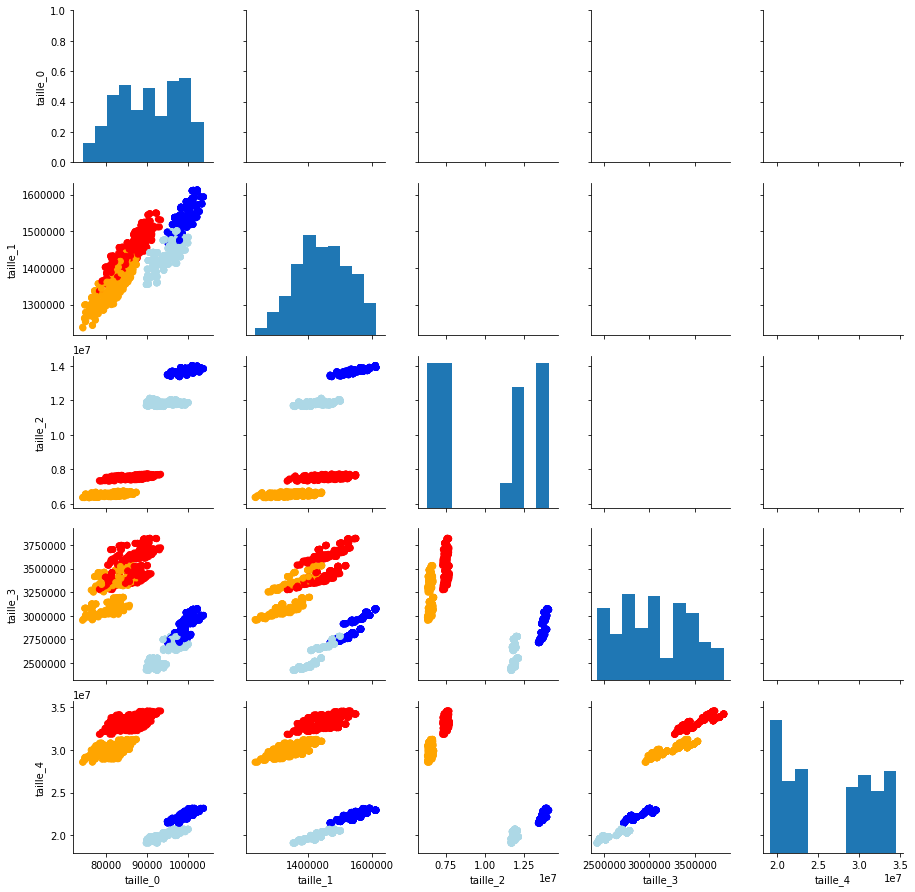

Temps


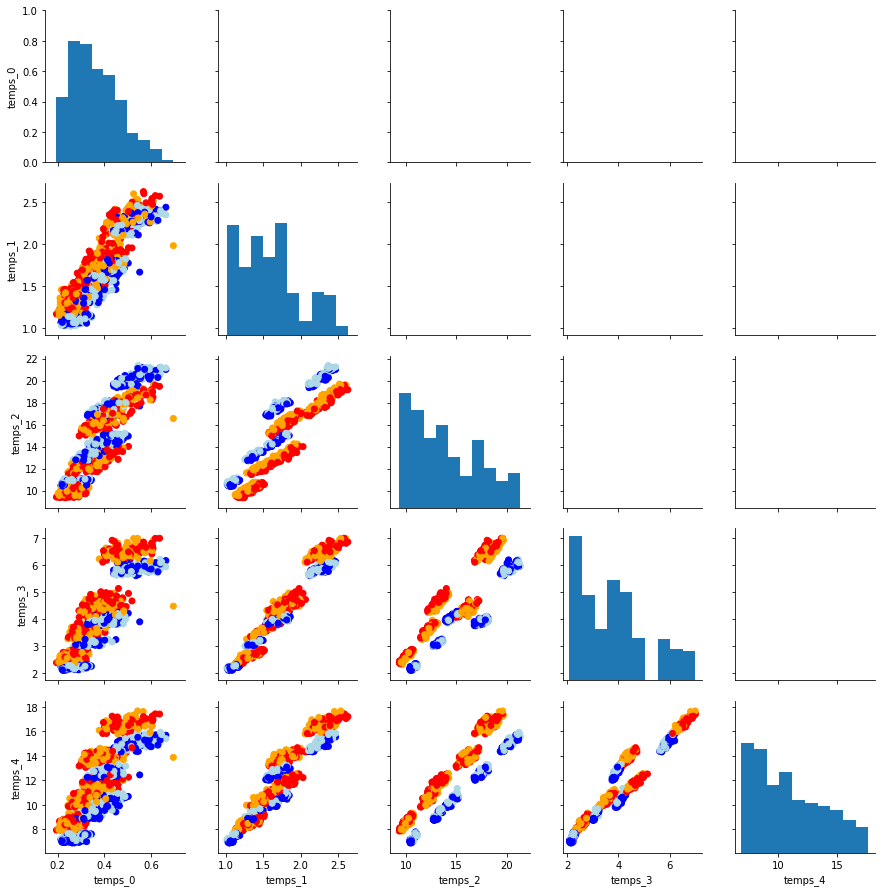

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#la vidéo donne le squelette de la grosse bdd que l'on forme avec tous les temps et toutes les tailles

video = listeVideo[0]

#les couleurs dépendent des paramètres, cf la légende

mbtree = video['no_mbtree']
cabac = video['no_cabac']

col = []

for i in range(len(video)):
    if mbtree[i]:
        if cabac[i]:
            col.append("blue")
        else:
            col.append("lightblue")    
    else:
        if cabac[i]:
            col.append("red")
        else:
            col.append("orange")
            
vid = video.drop(['configurationID','H264','size','usertime','systemtime','elapsedtime'],axis=1)

# On affiche les tailles

for i in range(len(listeVideo)):
    labTaille = 'taille_'+str(i)
    vid[labTaille] = listeVideo[i]['size']

print("Taille")

g = sns.PairGrid(vid.iloc[:,10:15])
#g = sns.PairGrid(vid.iloc[:,10:44])
g.map_lower(plt.scatter,color=col)
g.map_diag(plt.hist)  
plt.show()

# On affiche les temps

video = listeVideo[0]
vid = video.drop(['configurationID','H264','size','usertime','systemtime','elapsedtime'],axis=1)

for i in range(len(listeVideo)):
    labTemps = 'temps_'+str(i)
    vid[labTemps] = listeVideo[i]['elapsedtime']

print("Temps")

g = sns.PairGrid(vid.iloc[:,10:15])
#g = sns.PairGrid(vid.iloc[:,10:44])
g.map_lower(plt.scatter,color=col)
g.map_diag(plt.hist)  
plt.show()    

En diagonale, les histogrammes des temps/tailles. Sur la partie basse, on affiche les nuages de points entre la vidéo de la ligne i et de la colonne j.

<B>Légende</B>
- Bleu : no_mbtree et no_cabac
- Bleu clair: no_mbtree seul
- Rouge : no_cabac seul
- Orange : ni no_mbtree, ni no_cabac

Les temps et les tailles varient beaucoup d'une vidéo à l'autre. Les formes des clusters suivent plus souvent une tendance linéaire pour les comparaisons de temps. Pour la taille, c'est plus chaotique.

En fonction des paramètres, des groupes de points se forment. Les clusters sont définis par l'activation ou la désactivation d'un paramètres. Certaines vidéos sont plus sensibles à des paramètres que d'autres.

<font color="red" size = 5>Do inputs change the influential options?</font>

En moyenne (ici c'est l'importance des paramètres expliquant la taille seulement)

--

size
no_8x8dct 0.070321161733379
no_asm 0.0
no_cabac 0.3369134967502885
no_deblock 0.035365368754805
no_fast_pskip 0.017167893972259967
no_mbtree 0.37736891144404566
no_mixed_refs 0.020954734448726232
no_weightb 0.017267131472559427
rc_lookahead 0.05583515180618894
ref 0.0688061496177474


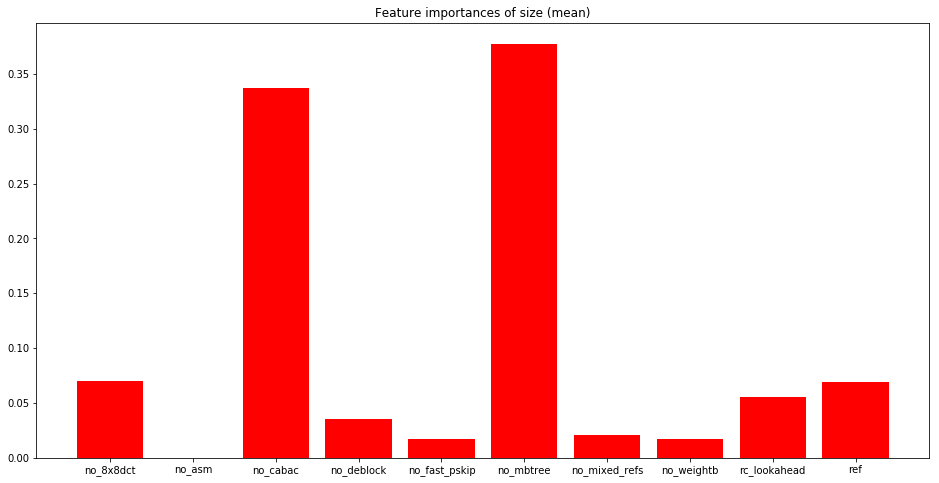

time
no_8x8dct 0.036345246930251277
no_asm 0.0
no_cabac 0.027585449563174685
no_deblock 0.02436200037623316
no_fast_pskip 0.030414521455708568
no_mbtree 0.08954682625616843
no_mixed_refs 0.14009126281984824
no_weightb 0.024724909378248346
rc_lookahead 0.06961542763428961
ref 0.5573143555860776


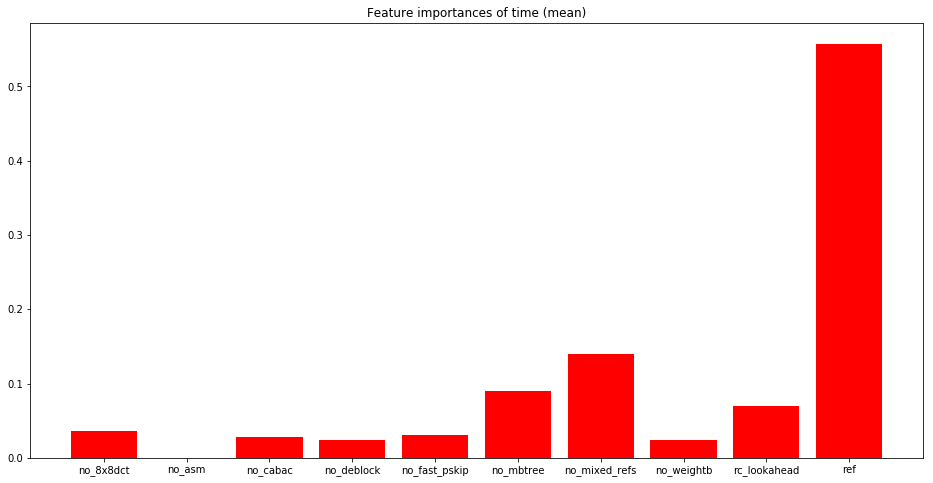

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np


listeImp = pd.DataFrame(columns=['idVideo','no_8x8dct','no_asm','no_cabac',
                           'no_deblock','no_fast_pskip','no_mbtree',
                           'no_mixed_refs','no_weightb','rc_lookahead','ref'])
listeImpTps = pd.DataFrame(columns=['idVideo','no_8x8dct','no_asm','no_cabac',
                           'no_deblock','no_fast_pskip','no_mbtree',
                           'no_mixed_refs','no_weightb','rc_lookahead','ref'])
n = 4
accuracy = [0.1]*len(listeVideo)
    
for j in range(len(listeVideo)):
    
    # on définit la vidéo courante, le temps et la taille de la video
    video = pd.DataFrame(listeVideo[j])
    etime = video['elapsedtime']
    taille = video['size']

    # on crée les classes de taille
    kmeans = KMeans(n_clusters=4)
    vid = pd.DataFrame()
    vid['size'] = taille
    kmeans.fit(vid)
    video['classeSize'] = kmeans.predict(vid)
    
    # On coupe nos données en apprentissage (70%) et en test (30%)
    video['is_train'] = np.random.uniform(0, 1, len(video)) <= .70
    train, test = video[video['is_train']==True], video[video['is_train']==False]
    train = train.sort_values(by='classeSize')
    test = test.sort_values(by='classeSize')

    # On prend en entrée les paramètres de la conversion de vidéo, 
    # et on essaie d'expliquer les classes de taille et de temps
    features = video.columns[2:12]
    y = pd.factorize(train['classeSize'])[0]

    # Modéle de randomForest avec 20 arbres
    clf = RandomForestClassifier(n_estimators=20)
    clf.fit(train[features], y)
    preds = clf.predict(test[features])
    
    # Matrice de confusion
    matConf = pd.crosstab(test['classeSize'],preds, rownames=['Actual'], colnames=['Predicted'])
    
    # Précision du modèle
    accuracy[j] = np.trace(matConf)/len(test)
    
    # Importance des paramètres
    imp = list(zip(train[features], clf.feature_importances_))
    listeImp.loc[j]=j
    for k in range(len(imp)):
        listeImp.loc[j][k+1] = imp[k][1]
    
    listeVideo[j] = video.drop(['classeSize','is_train'],axis=1)
    #Affichage
    #print("video ",j," : precision = ",accuracy[j])
    #print(matConf)
    
    # on crée les classes de taille
    kmeans = KMeans(n_clusters=4)
    vid = pd.DataFrame()
    vid['time'] = etime
    kmeans.fit(vid)
    video['classeTemps'] = kmeans.predict(vid)
    
    # On coupe nos données en apprentissage (70%) et en test (30%)
    video['is_train'] = np.random.uniform(0, 1, len(video)) <= .70
    train, test = video[video['is_train']==True], video[video['is_train']==False]
    train = train.sort_values(by='classeTemps')
    test = test.sort_values(by='classeTemps')

    # On prend en entrée les paramètres de la conversion de vidéo, 
    # et on essaie d'expliquer les classes de taille et de temps
    features = video.columns[2:12]
    y = pd.factorize(train['classeTemps'])[0]

    # Modéle de randomForest avec 20 arbres
    clf = RandomForestClassifier(n_estimators=20)
    clf.fit(train[features], y)
    preds = clf.predict(test[features])

    # Importance des paramètres
    imp = list(zip(train[features], clf.feature_importances_))
    listeImpTps.loc[j]=j
    for k in range(len(imp)):
        listeImpTps.loc[j][k+1] = imp[k][1]
    
    listeVideo[j] = video.drop(['classeTemps','is_train'],axis=1)
    #Affichage
    #print("video ",j," : precision = ",accuracy[j])
    #print(matConf)
    
print("size")    

moy = [0]*(len(listeImp.columns)-1)
lib = ["a"]*(len(listeImp.columns)-1)

for j in range(len(listeImp.columns)-1):
    lib[j] = listeImp.columns[j+1]
    moy[j] =  np.mean(listeImp[listeImp.columns[j+1]])
    print(lib[j],moy[j])
    
plt.figure(figsize=(16, 8))
plt.title("Feature importances of size (mean)")
plt.bar(lib, moy,color="r", align="center")
plt.show()

print("time")

moyTps = [0]*(len(listeImpTps.columns)-1)
libTps = ["a"]*(len(listeImpTps.columns)-1)

for j in range(len(listeImpTps.columns)-1):
    libTps[j] = listeImpTps.columns[j+1]
    moyTps[j] =  np.mean(listeImpTps[listeImpTps.columns[j+1]])
    print(libTps[j],moyTps[j])
    

plt.figure(figsize=(16, 8))
plt.title("Feature importances of time (mean)")
plt.bar(libTps, moyTps,color="r", align="center")
plt.show()

<font color="red" size = 5>Do inputs change the influential options?</font>

Puis vidéo par vidéo

--

Video 0: 
Feature ranking:
1. feature no_mbtree 5 (0.739176)
2. feature no_cabac 2 (0.113795)
3. feature rc_lookahead 8 (0.071542)
4. feature no_8x8dct 0 (0.042693)
5. feature no_fast_pskip 4 (0.017494)
6. feature no_deblock 3 (0.005020)
7. feature no_mixed_refs 6 (0.004918)
8. feature ref 9 (0.004511)
9. feature no_weightb 7 (0.000851)
10. feature no_asm 1 (0.000000)


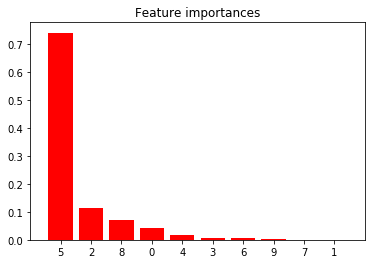

Prediction score: 0.28
Video 1: 
Feature ranking:
1. feature no_cabac 2 (0.451076)
2. feature no_mbtree 5 (0.280480)
3. feature rc_lookahead 8 (0.092331)
4. feature no_8x8dct 0 (0.074730)
5. feature ref 9 (0.065304)
6. feature no_mixed_refs 6 (0.021015)
7. feature no_deblock 3 (0.014198)
8. feature no_fast_pskip 4 (0.000689)
9. feature no_weightb 7 (0.000177)
10. feature no_asm 1 (0.000000)


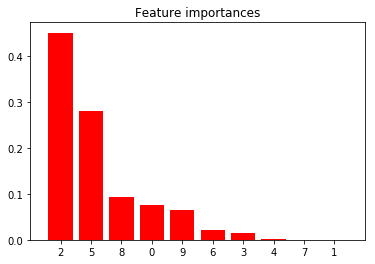

Prediction score: 0.07
Video 2: 
Feature ranking:
1. feature no_mbtree 5 (0.935867)
2. feature no_cabac 2 (0.062525)
3. feature no_deblock 3 (0.000891)
4. feature no_8x8dct 0 (0.000236)
5. feature ref 9 (0.000228)
6. feature no_fast_pskip 4 (0.000092)
7. feature rc_lookahead 8 (0.000068)
8. feature no_weightb 7 (0.000062)
9. feature no_mixed_refs 6 (0.000031)
10. feature no_asm 1 (0.000000)


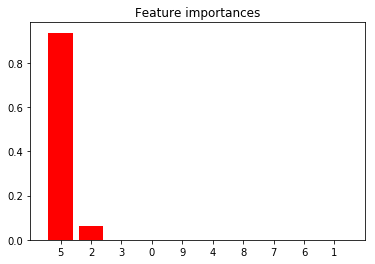

Prediction score: 0.06
Video 3: 
Feature ranking:
1. feature no_mbtree 5 (0.704025)
2. feature no_cabac 2 (0.157839)
3. feature no_8x8dct 0 (0.113511)
4. feature ref 9 (0.017250)
5. feature rc_lookahead 8 (0.003417)
6. feature no_deblock 3 (0.002491)
7. feature no_mixed_refs 6 (0.001431)
8. feature no_weightb 7 (0.000021)
9. feature no_fast_pskip 4 (0.000016)
10. feature no_asm 1 (0.000000)


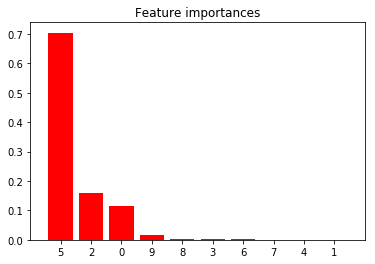

Prediction score: 0.04
Video 4: 
Feature ranking:
1. feature no_mbtree 5 (0.920236)
2. feature no_cabac 2 (0.067479)
3. feature no_8x8dct 0 (0.009077)
4. feature no_mixed_refs 6 (0.000995)
5. feature no_deblock 3 (0.000972)
6. feature rc_lookahead 8 (0.000638)
7. feature ref 9 (0.000600)
8. feature no_fast_pskip 4 (0.000001)
9. feature no_weightb 7 (0.000001)
10. feature no_asm 1 (0.000000)


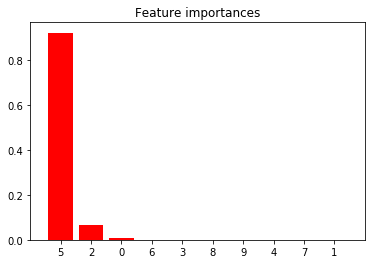

Prediction score: 0.02
Video 5: 
Feature ranking:
1. feature no_mbtree 5 (0.858305)
2. feature no_cabac 2 (0.107855)
3. feature no_8x8dct 0 (0.015277)
4. feature ref 9 (0.009505)
5. feature no_weightb 7 (0.004139)
6. feature no_mixed_refs 6 (0.002793)
7. feature rc_lookahead 8 (0.002089)
8. feature no_fast_pskip 4 (0.000019)
9. feature no_deblock 3 (0.000018)
10. feature no_asm 1 (0.000000)


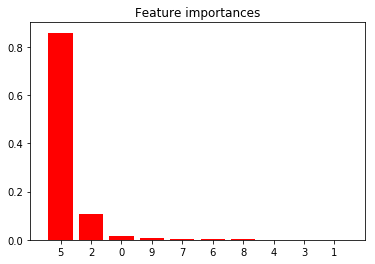

Prediction score: 0.06
Video 6: 
Feature ranking:
1. feature no_mbtree 5 (0.778797)
2. feature ref 9 (0.122532)
3. feature no_cabac 2 (0.066100)
4. feature rc_lookahead 8 (0.017458)
5. feature no_mixed_refs 6 (0.007612)
6. feature no_8x8dct 0 (0.007441)
7. feature no_weightb 7 (0.000037)
8. feature no_deblock 3 (0.000015)
9. feature no_fast_pskip 4 (0.000007)
10. feature no_asm 1 (0.000000)


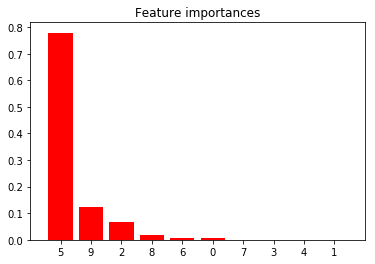

Prediction score: 0.04
Video 7: 
Feature ranking:
1. feature no_mbtree 5 (0.806621)
2. feature no_cabac 2 (0.180640)
3. feature no_8x8dct 0 (0.009655)
4. feature no_mixed_refs 6 (0.001312)
5. feature ref 9 (0.001185)
6. feature no_deblock 3 (0.000468)
7. feature no_weightb 7 (0.000062)
8. feature no_fast_pskip 4 (0.000033)
9. feature rc_lookahead 8 (0.000025)
10. feature no_asm 1 (0.000000)


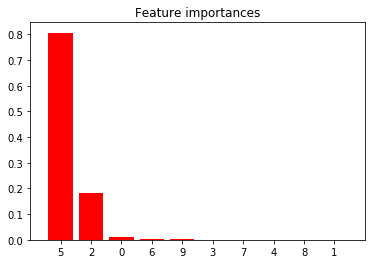

Prediction score: 0.05
Video 8: 
Feature ranking:
1. feature no_mbtree 5 (0.556660)
2. feature no_cabac 2 (0.407911)
3. feature rc_lookahead 8 (0.015395)
4. feature no_8x8dct 0 (0.009765)
5. feature ref 9 (0.004983)
6. feature no_mixed_refs 6 (0.002662)
7. feature no_fast_pskip 4 (0.001740)
8. feature no_deblock 3 (0.000862)
9. feature no_weightb 7 (0.000021)
10. feature no_asm 1 (0.000000)


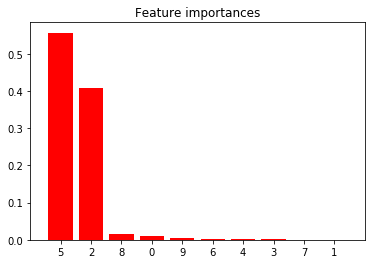

Prediction score: 0.06
Video 9: 
Feature ranking:
1. feature no_mbtree 5 (0.961231)
2. feature no_cabac 2 (0.025828)
3. feature no_8x8dct 0 (0.006950)
4. feature ref 9 (0.005175)
5. feature no_mixed_refs 6 (0.000758)
6. feature rc_lookahead 8 (0.000030)
7. feature no_weightb 7 (0.000018)
8. feature no_deblock 3 (0.000008)
9. feature no_fast_pskip 4 (0.000002)
10. feature no_asm 1 (0.000000)


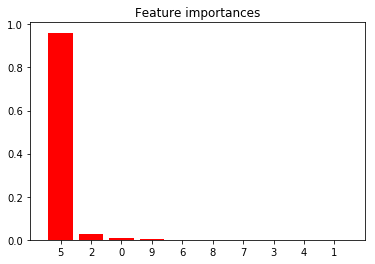

Prediction score: 0.02
Video 10: 
Feature ranking:
1. feature no_mbtree 5 (0.548705)
2. feature no_cabac 2 (0.193385)
3. feature no_deblock 3 (0.134611)
4. feature no_8x8dct 0 (0.047949)
5. feature rc_lookahead 8 (0.047196)
6. feature no_fast_pskip 4 (0.021078)
7. feature ref 9 (0.006243)
8. feature no_mixed_refs 6 (0.000720)
9. feature no_weightb 7 (0.000112)
10. feature no_asm 1 (0.000000)


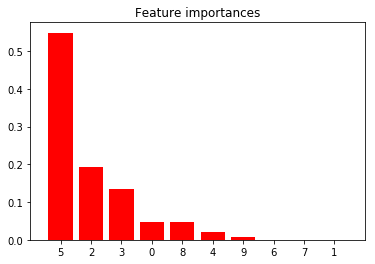

Prediction score: 0.18
Video 11: 
Feature ranking:
1. feature no_mbtree 5 (0.775077)
2. feature no_cabac 2 (0.098906)
3. feature ref 9 (0.082401)
4. feature no_deblock 3 (0.020880)
5. feature no_8x8dct 0 (0.018202)
6. feature rc_lookahead 8 (0.004349)
7. feature no_mixed_refs 6 (0.000117)
8. feature no_fast_pskip 4 (0.000058)
9. feature no_weightb 7 (0.000009)
10. feature no_asm 1 (0.000000)


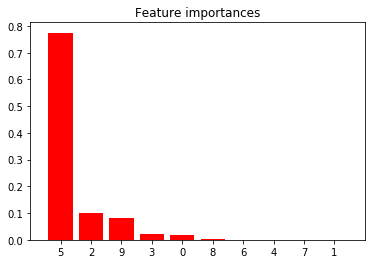

Prediction score: 0.11
Video 12: 
Feature ranking:
1. feature no_mbtree 5 (0.827715)
2. feature no_cabac 2 (0.168212)
3. feature no_8x8dct 0 (0.001215)
4. feature no_deblock 3 (0.001064)
5. feature no_weightb 7 (0.000981)
6. feature ref 9 (0.000336)
7. feature rc_lookahead 8 (0.000192)
8. feature no_mixed_refs 6 (0.000159)
9. feature no_fast_pskip 4 (0.000126)
10. feature no_asm 1 (0.000000)


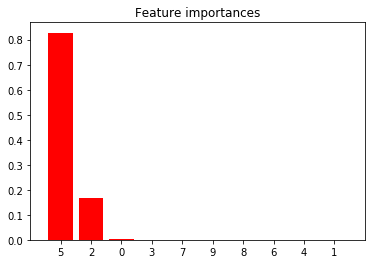

Prediction score: 0.11
Video 13: 
Feature ranking:
1. feature no_cabac 2 (0.374376)
2. feature ref 9 (0.295790)
3. feature no_mbtree 5 (0.218897)
4. feature rc_lookahead 8 (0.078636)
5. feature no_8x8dct 0 (0.022907)
6. feature no_deblock 3 (0.008648)
7. feature no_mixed_refs 6 (0.000694)
8. feature no_weightb 7 (0.000041)
9. feature no_fast_pskip 4 (0.000014)
10. feature no_asm 1 (0.000000)


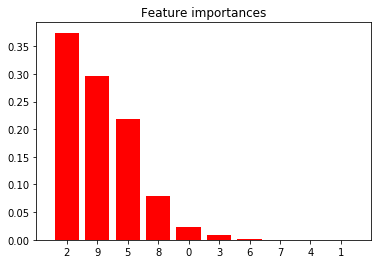

Prediction score: 0.04
Video 14: 
Feature ranking:
1. feature no_mbtree 5 (0.473232)
2. feature no_cabac 2 (0.417527)
3. feature ref 9 (0.042051)
4. feature no_8x8dct 0 (0.031028)
5. feature no_deblock 3 (0.027689)
6. feature rc_lookahead 8 (0.005224)
7. feature no_fast_pskip 4 (0.002357)
8. feature no_mixed_refs 6 (0.000798)
9. feature no_weightb 7 (0.000094)
10. feature no_asm 1 (0.000000)


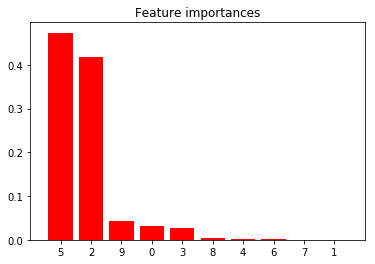

Prediction score: 0.07
Video 15: 
Feature ranking:
1. feature no_mbtree 5 (0.919613)
2. feature no_cabac 2 (0.068043)
3. feature no_8x8dct 0 (0.009111)
4. feature no_mixed_refs 6 (0.000997)
5. feature no_deblock 3 (0.000970)
6. feature rc_lookahead 8 (0.000654)
7. feature ref 9 (0.000610)
8. feature no_fast_pskip 4 (0.000001)
9. feature no_weightb 7 (0.000001)
10. feature no_asm 1 (0.000000)


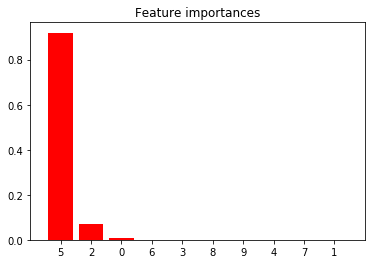

Prediction score: 0.02
Video 16: 
Feature ranking:
1. feature no_cabac 2 (0.555460)
2. feature no_mbtree 5 (0.417466)
3. feature no_8x8dct 0 (0.024186)
4. feature no_weightb 7 (0.001885)
5. feature no_deblock 3 (0.000704)
6. feature ref 9 (0.000223)
7. feature no_mixed_refs 6 (0.000071)
8. feature rc_lookahead 8 (0.000003)
9. feature no_fast_pskip 4 (0.000002)
10. feature no_asm 1 (0.000000)


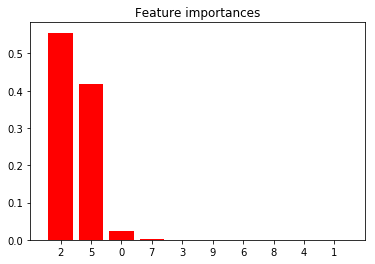

Prediction score: 0.02
Video 17: 
Feature ranking:
1. feature no_mbtree 5 (0.685495)
2. feature no_cabac 2 (0.129136)
3. feature no_8x8dct 0 (0.102628)
4. feature no_deblock 3 (0.070300)
5. feature ref 9 (0.011276)
6. feature no_weightb 7 (0.000514)
7. feature no_fast_pskip 4 (0.000431)
8. feature no_mixed_refs 6 (0.000186)
9. feature rc_lookahead 8 (0.000033)
10. feature no_asm 1 (0.000000)


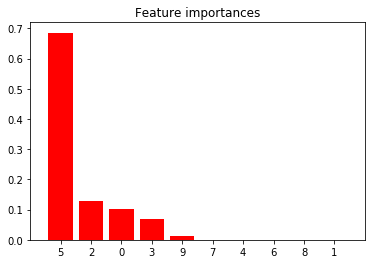

Prediction score: 0.11
Video 18: 
Feature ranking:
1. feature no_mbtree 5 (0.535415)
2. feature no_cabac 2 (0.378268)
3. feature no_8x8dct 0 (0.062346)
4. feature ref 9 (0.010574)
5. feature no_deblock 3 (0.007780)
6. feature no_mixed_refs 6 (0.002587)
7. feature rc_lookahead 8 (0.001880)
8. feature no_weightb 7 (0.000714)
9. feature no_fast_pskip 4 (0.000437)
10. feature no_asm 1 (0.000000)


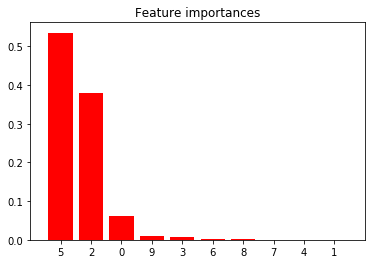

Prediction score: 0.11
Video 19: 
Feature ranking:
1. feature no_mbtree 5 (0.828018)
2. feature no_cabac 2 (0.167949)
3. feature no_8x8dct 0 (0.001207)
4. feature no_deblock 3 (0.001050)
5. feature no_weightb 7 (0.000960)
6. feature ref 9 (0.000338)
7. feature rc_lookahead 8 (0.000190)
8. feature no_mixed_refs 6 (0.000161)
9. feature no_fast_pskip 4 (0.000127)
10. feature no_asm 1 (0.000000)


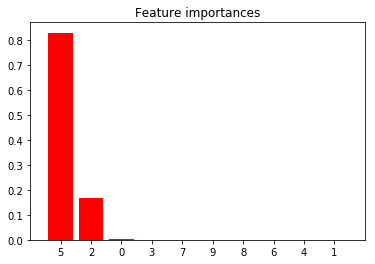

Prediction score: 0.11
Video 20: 
Feature ranking:
1. feature no_cabac 2 (0.783450)
2. feature no_8x8dct 0 (0.095270)
3. feature ref 9 (0.042354)
4. feature no_mixed_refs 6 (0.038313)
5. feature no_deblock 3 (0.015842)
6. feature no_mbtree 5 (0.014454)
7. feature no_fast_pskip 4 (0.005576)
8. feature no_weightb 7 (0.002824)
9. feature rc_lookahead 8 (0.001917)
10. feature no_asm 1 (0.000000)


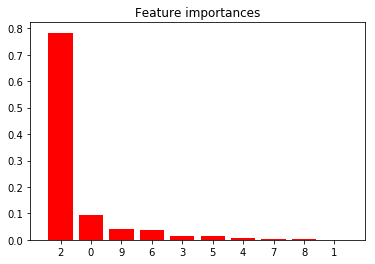

Prediction score: 0.15
Video 21: 
Feature ranking:
1. feature no_mbtree 5 (0.805584)
2. feature no_cabac 2 (0.181582)
3. feature no_8x8dct 0 (0.009713)
4. feature no_mixed_refs 6 (0.001326)
5. feature ref 9 (0.001203)
6. feature no_deblock 3 (0.000471)
7. feature no_weightb 7 (0.000062)
8. feature no_fast_pskip 4 (0.000033)
9. feature rc_lookahead 8 (0.000025)
10. feature no_asm 1 (0.000000)


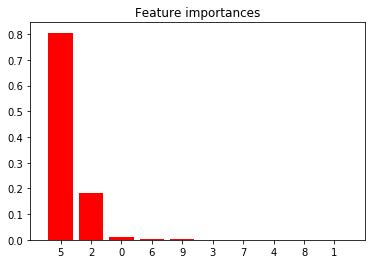

Prediction score: 0.05
Video 22: 
Feature ranking:
1. feature no_cabac 2 (0.468302)
2. feature no_mbtree 5 (0.312045)
3. feature no_8x8dct 0 (0.140858)
4. feature ref 9 (0.057709)
5. feature no_mixed_refs 6 (0.013633)
6. feature rc_lookahead 8 (0.003840)
7. feature no_weightb 7 (0.002395)
8. feature no_deblock 3 (0.001077)
9. feature no_fast_pskip 4 (0.000140)
10. feature no_asm 1 (0.000000)


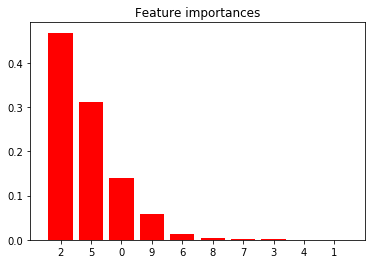

Prediction score: 0.06
Video 23: 
Feature ranking:
1. feature no_mbtree 5 (0.942819)
2. feature no_cabac 2 (0.048877)
3. feature no_8x8dct 0 (0.003958)
4. feature no_deblock 3 (0.002610)
5. feature ref 9 (0.001153)
6. feature no_fast_pskip 4 (0.000483)
7. feature no_weightb 7 (0.000056)
8. feature rc_lookahead 8 (0.000030)
9. feature no_mixed_refs 6 (0.000014)
10. feature no_asm 1 (0.000000)


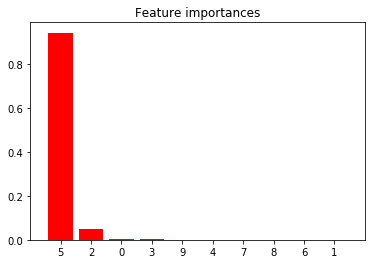

Prediction score: 0.03
Video 24: 
Feature ranking:
1. feature no_mbtree 5 (0.843944)
2. feature rc_lookahead 8 (0.085247)
3. feature no_cabac 2 (0.053521)
4. feature no_8x8dct 0 (0.007369)
5. feature no_weightb 7 (0.003841)
6. feature no_mixed_refs 6 (0.002627)
7. feature ref 9 (0.001824)
8. feature no_deblock 3 (0.001035)
9. feature no_fast_pskip 4 (0.000592)
10. feature no_asm 1 (0.000000)


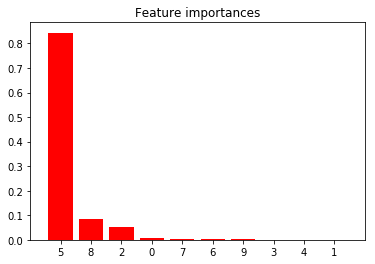

Prediction score: 0.22
Video 25: 
Feature ranking:
1. feature no_mbtree 5 (0.966275)
2. feature no_cabac 2 (0.013946)
3. feature no_8x8dct 0 (0.012362)
4. feature rc_lookahead 8 (0.005804)
5. feature ref 9 (0.001468)
6. feature no_mixed_refs 6 (0.000063)
7. feature no_deblock 3 (0.000044)
8. feature no_weightb 7 (0.000037)
9. feature no_fast_pskip 4 (0.000002)
10. feature no_asm 1 (0.000000)


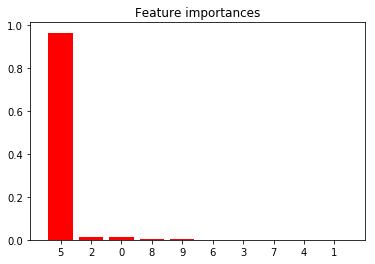

Prediction score: 0.04
Video 26: 
Feature ranking:
1. feature no_mbtree 5 (0.504681)
2. feature no_cabac 2 (0.392267)
3. feature no_8x8dct 0 (0.059796)
4. feature rc_lookahead 8 (0.031551)
5. feature no_deblock 3 (0.008447)
6. feature ref 9 (0.002205)
7. feature no_mixed_refs 6 (0.000548)
8. feature no_fast_pskip 4 (0.000482)
9. feature no_weightb 7 (0.000024)
10. feature no_asm 1 (0.000000)


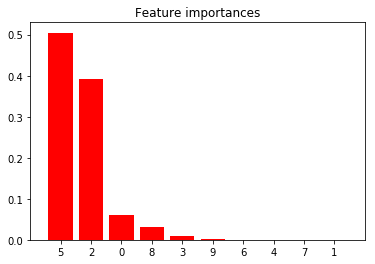

Prediction score: 0.07
Video 27: 
Feature ranking:
1. feature no_cabac 2 (0.893246)
2. feature no_mbtree 5 (0.062180)
3. feature no_8x8dct 0 (0.025641)
4. feature no_deblock 3 (0.010920)
5. feature ref 9 (0.007573)
6. feature no_mixed_refs 6 (0.000408)
7. feature no_weightb 7 (0.000031)
8. feature rc_lookahead 8 (0.000000)
9. feature no_fast_pskip 4 (0.000000)
10. feature no_asm 1 (0.000000)


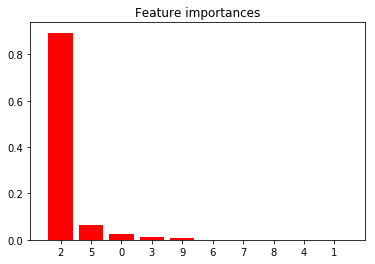

Prediction score: 0.00
Video 28: 
Feature ranking:
1. feature no_cabac 2 (0.806266)
2. feature no_mbtree 5 (0.068778)
3. feature no_deblock 3 (0.046308)
4. feature no_8x8dct 0 (0.038971)
5. feature ref 9 (0.033591)
6. feature no_mixed_refs 6 (0.004486)
7. feature rc_lookahead 8 (0.001345)
8. feature no_fast_pskip 4 (0.000231)
9. feature no_weightb 7 (0.000023)
10. feature no_asm 1 (0.000000)


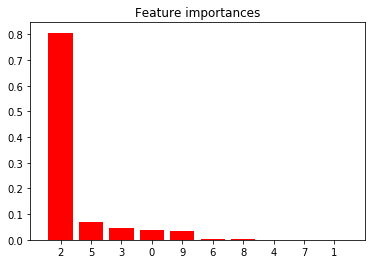

Prediction score: 0.04
Video 29: 
Feature ranking:
1. feature no_mbtree 5 (0.811995)
2. feature no_cabac 2 (0.180153)
3. feature no_8x8dct 0 (0.005507)
4. feature ref 9 (0.001490)
5. feature no_mixed_refs 6 (0.000704)
6. feature no_deblock 3 (0.000128)
7. feature no_fast_pskip 4 (0.000011)
8. feature no_weightb 7 (0.000010)
9. feature rc_lookahead 8 (0.000003)
10. feature no_asm 1 (0.000000)


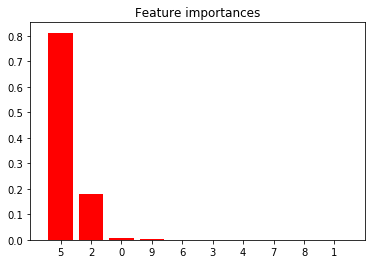

Prediction score: 0.02
Video 30: 
Feature ranking:
1. feature no_cabac 2 (0.580441)
2. feature no_mbtree 5 (0.231346)
3. feature no_deblock 3 (0.070101)
4. feature ref 9 (0.065276)
5. feature no_8x8dct 0 (0.025786)
6. feature rc_lookahead 8 (0.024711)
7. feature no_fast_pskip 4 (0.001005)
8. feature no_mixed_refs 6 (0.000984)
9. feature no_weightb 7 (0.000350)
10. feature no_asm 1 (0.000000)


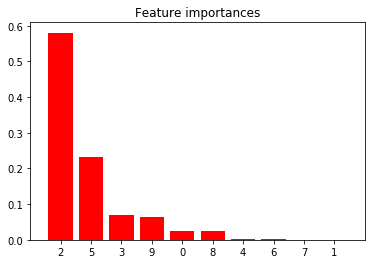

Prediction score: 0.18
Video 31: 
Feature ranking:
1. feature no_mbtree 5 (0.896788)
2. feature no_cabac 2 (0.076013)
3. feature no_weightb 7 (0.023192)
4. feature no_8x8dct 0 (0.003663)
5. feature no_deblock 3 (0.000201)
6. feature no_mixed_refs 6 (0.000090)
7. feature ref 9 (0.000051)
8. feature rc_lookahead 8 (0.000001)
9. feature no_fast_pskip 4 (0.000000)
10. feature no_asm 1 (0.000000)


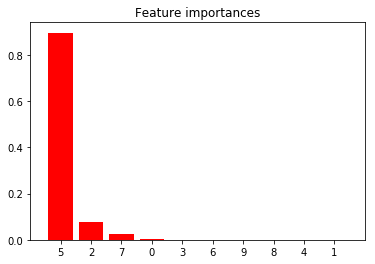

Prediction score: 0.02
Video 32: 
Feature ranking:
1. feature no_mbtree 5 (0.660126)
2. feature no_cabac 2 (0.198489)
3. feature rc_lookahead 8 (0.105564)
4. feature no_8x8dct 0 (0.026538)
5. feature no_mixed_refs 6 (0.004162)
6. feature ref 9 (0.003611)
7. feature no_deblock 3 (0.001407)
8. feature no_fast_pskip 4 (0.000060)
9. feature no_weightb 7 (0.000043)
10. feature no_asm 1 (0.000000)


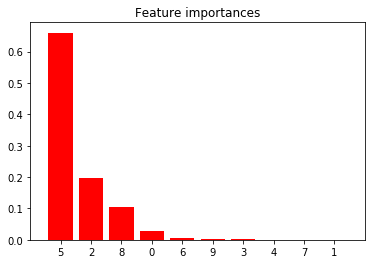

Prediction score: 0.07
Video 33: 
Feature ranking:
1. feature no_cabac 2 (0.439474)
2. feature rc_lookahead 8 (0.213655)
3. feature no_mbtree 5 (0.207714)
4. feature no_8x8dct 0 (0.076237)
5. feature ref 9 (0.043299)
6. feature no_mixed_refs 6 (0.013387)
7. feature no_deblock 3 (0.005017)
8. feature no_fast_pskip 4 (0.000904)
9. feature no_weightb 7 (0.000312)
10. feature no_asm 1 (0.000000)


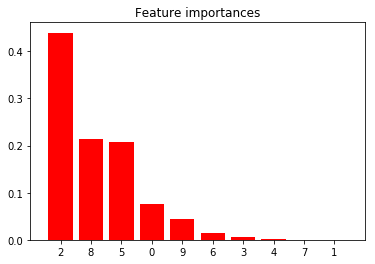

Prediction score: 0.11


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [5]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split  
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error

def mean_relative_error(y_true, y_pred): 
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def ftImportancesByVideo(idVideo): 
    
    X, y = listeVideo[idVideo], listeVideo[idVideo]['size']
    X = X.drop(['H264', 'configurationID', 'usertime', 'systemtime', 'elapsedtime', 'size'],axis=1)
    clf = RandomForestRegressor(n_estimators=100)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)  
    freg = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    importances = freg.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    

    print("Video %d: " % idVideo)
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %s %d (%f)" % (f + 1, X.columns[indices[f]], indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],color="r", align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    acc = mean_relative_error (y_test,y_pred)
    print("Prediction score: %.2f" % (acc))
    return importances, indices

s_indices = np.zeros((10, len(listeVideo)), dtype='int')
for idVideo in range(len(listeVideo)):
    imps, inds = ftImportancesByVideo(idVideo)
    for i in inds:
        s_indices[i][idVideo] = imps[i]
s_indices

<B>TODO :</B>
- ?

<br/>

<font size =10><B>RQ2</B></font>

--

<font color="red" size = 5><B>Can we group inputs together? </B></font>

L'intuition expliquée par les matrices de corrélations

--

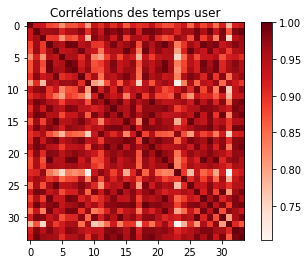

Les coefficicients des temps utilisateurs sont très corrélés, les coef. sont souvent > 0.8
C'est bon signe, on doit pourvoir trouver des paramètres optimaux
communs à toutes les vidéos pour diminuer les temps users


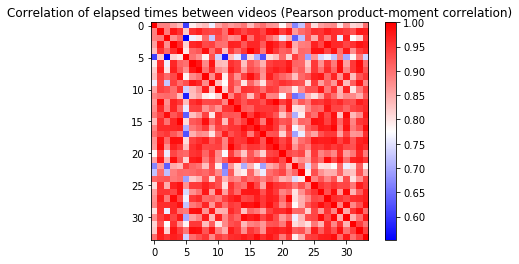

Les temps écoulés sont également fortement correlés entre les vidéos
Mais on peut voir une 'anomalie' dans certaines vidéos


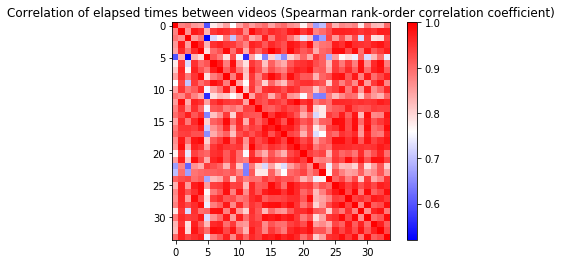

Les temps écoulés sont également fortement correlés entre les vidéos
Mais on peut voir une 'anomalie' dans certaines vidéos
Negligible difference between Spearman and Pearson:  0.02 -0.07 0.05
Min, max, mean, std of Spearman:  0.55 1.00 0.07 0.91


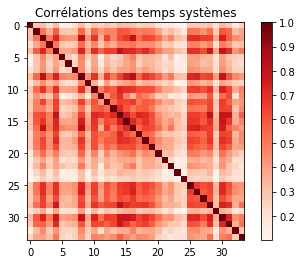

Les temps système sont moins corrélés linéairement, peut-être un autre type de relation


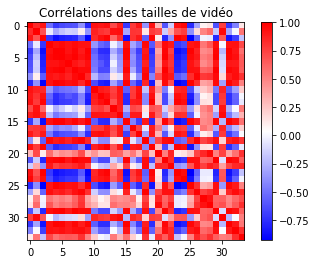

En revanche, les tailles des vidéos dépendent moins des paramètres d'entrée
Un paramètre peut donner une bonne qualité pour une vidéo mais une mauvaise pour une autre
Du coup, l'intérêt, c'est de classifier les vidéos pour comprendre l'influence des paramètres sur leur taille


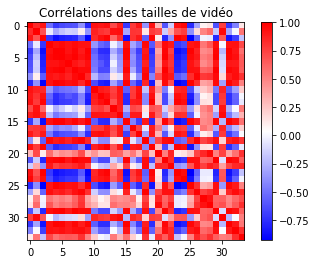

Negligible difference between Spearman and Pearson:  0.10 -0.39 0.15
Min, max, mean, std of Spearman:  -0.92 1.00 0.65 0.28


In [8]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

from numpy import *

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html

# on définit le nombre de vidéos, la taille de la liste des données
taille = len(listeVideo)

# Dans un premier temps, on cherche à calculer la matrice de coorélation des temps utilisateurs de conversion des vidéos
# Ici, on a 34 vidéos, c'est donc une matrice 34*34

corrTemps = [[0 for x in range(taille)] for y in range(taille)]

# pour chaque vidéo, on calcule sa corrélation (Pearson) avec toutes les autres

for i in range(taille):
    for j in range(taille):
        corrTemps[i][j] = np.corrcoef(listeVideo[i].usertime,listeVideo[j].usertime)[0,1]

# et on affiche la matrice des corrélations en couleur

plt.imshow(corrTemps,cmap='Reds',interpolation='nearest')
plt.title('Corrélations des temps user')
plt.colorbar()
plt.show()

print("Les coefficicients des temps utilisateurs sont très corrélés, les coef. sont souvent > 0.8")
print("C'est bon signe, on doit pourvoir trouver des paramètres optimaux")
print("communs à toutes les vidéos pour diminuer les temps users")


# On applique le même programme pour le temps écoulé

corrElap= [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrElap[i][j] = np.corrcoef(listeVideo[i]['elapsedtime'],listeVideo[j]['elapsedtime'])[0,1]
        
plt.imshow(corrElap,cmap='bwr',interpolation='nearest')
plt.title('Correlation of elapsed times between videos (Pearson product-moment correlation)')
plt.colorbar()
plt.show()

print("Les temps écoulés sont également fortement correlés entre les vidéos")
print("Mais on peut voir une 'anomalie' dans certaines vidéos")

corrElapSpearman= [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrElapSpearman[i][j] = stats.spearmanr(listeVideo[i]['elapsedtime'],listeVideo[j]['elapsedtime']).correlation
        
plt.imshow(corrElapSpearman,cmap='bwr',interpolation='nearest')
plt.title('Correlation of elapsed times between videos (Spearman rank-order correlation coefficient)')
plt.colorbar()
plt.show()

print("Les temps écoulés sont également fortement correlés entre les vidéos")
print("Mais on peut voir une 'anomalie' dans certaines vidéos")

# no difference between Spearman and Pearson 
dElap = np.subtract(corrElap, corrElapSpearman)
print("Negligible difference between Spearman and Pearson:  %.2f %.2f %.2f" % (np.std(dElap), np.min(dElap), np.max(dElap)))


print("Min, max, mean, std of Spearman:  %.2f %.2f %.2f %.2f" % (np.min(corrElap), np.max(corrElap), np.std(corrElap), np.mean(corrElap)))




# On applique le même programme pour le temps système

corrSys= [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrSys[i][j] = np.corrcoef(listeVideo[i]['systemtime'],listeVideo[j]['systemtime'])[0,1]

plt.imshow(corrSys,cmap='Reds',interpolation='nearest')
plt.title('Corrélations des temps systèmes')
plt.colorbar()
plt.show()

print("Les temps système sont moins corrélés linéairement, peut-être un autre type de relation")

# Enfin, on calcule la matrice des corrélations relative aux tailles

corrTaille = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrTaille[i][j] = np.corrcoef(listeVideo[i]['size'],listeVideo[j]['size'])[0,1]

plt.imshow(corrTaille,cmap='bwr',interpolation='nearest')
plt.title('Corrélations des tailles de vidéo')
plt.colorbar()
plt.show()

print("En revanche, les tailles des vidéos dépendent moins des paramètres d'entrée")
print("Un paramètre peut donner une bonne qualité pour une vidéo mais une mauvaise pour une autre")
print("Du coup, l'intérêt, c'est de classifier les vidéos pour comprendre l'influence des paramètres sur leur taille")


corrTailleSpearman = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrTailleSpearman[i][j] = stats.spearmanr(listeVideo[i]['size'],listeVideo[j]['size']).correlation
 
plt.imshow(corrTaille,cmap='bwr',interpolation='nearest') # origin='bottom',
plt.title('Corrélations des tailles de vidéo')
plt.colorbar()
plt.show()



# no difference between Spearman and Pearson 
dTaille = np.subtract(corrTaille, corrTailleSpearman)
print("Negligible difference between Spearman and Pearson:  %.2f %.2f %.2f" % (np.std(dTaille), np.min(dTaille), np.max(dTaille)))


print("Min, max, mean, std of Spearman:  %.2f %.2f %.2f %.2f" % (np.min(corrTaille), np.max(corrTaille), np.std(corrTaille), np.mean(corrTaille)))




L'idée, par la suite, c'est de créer des groupes de vidéos cohérents à l'aide d'algorithmes de clustering

<font color="red" size = 5><B>Can we group inputs together? </B></font>

Classification hiérarchique

--

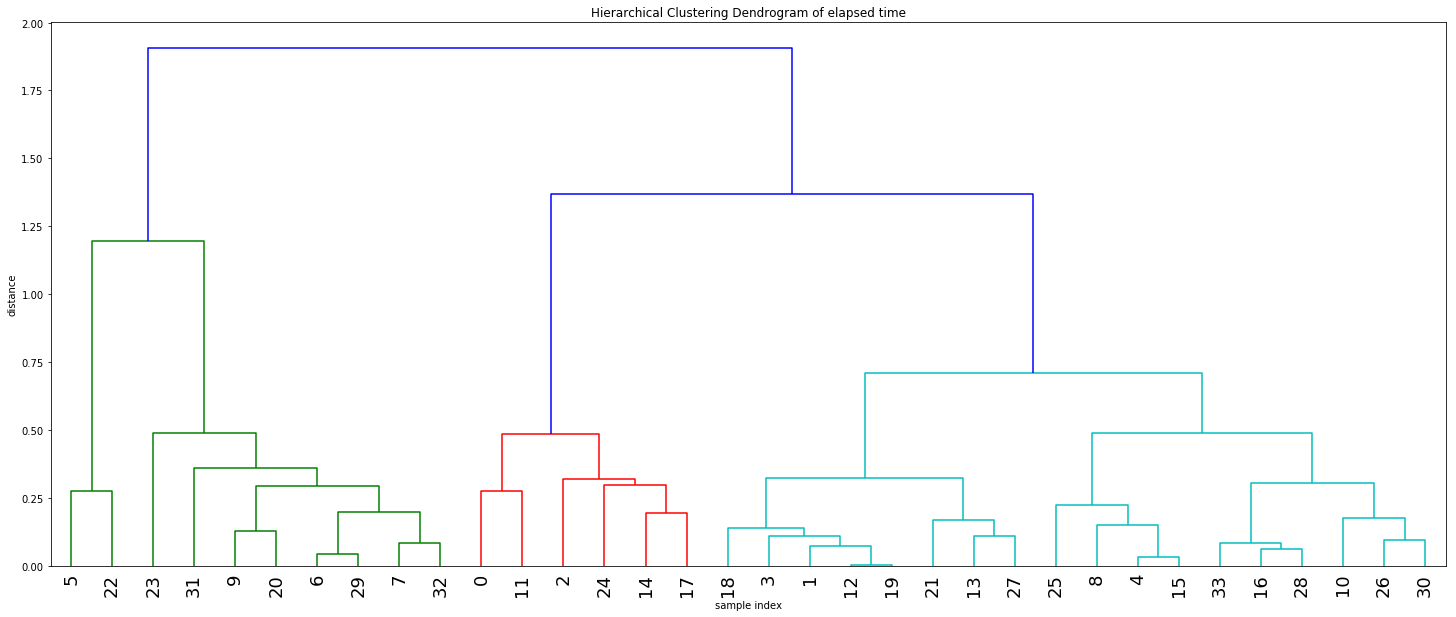

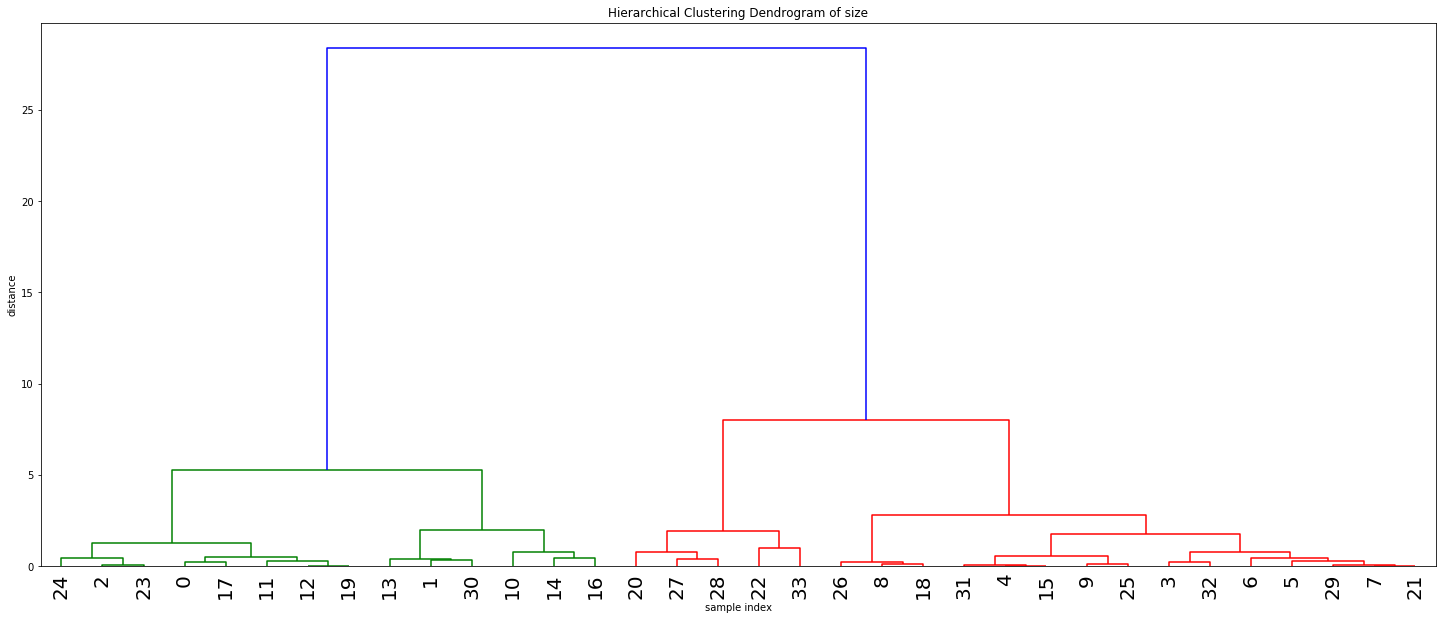

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MeanShift


dendTime = linkage(corrElap, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of elapsed time')
plt.xlabel('sample index')
plt.ylabel('distance')
d = dendrogram(    
    dendTime,    
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
)
d
plt.show()

indicesTemps = d['leaves']


dendTaille = linkage(corrTaille, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of size')
plt.xlabel('sample index')
plt.ylabel('distance')
d = dendrogram(    
    dendTaille,    
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=20.,  # font size for the x axis labels
)
d
plt.show()

indicesTaille = d['leaves']

<font color="red" size = 5><B>Can we group inputs together? </B></font>

Classification hiérarchique (suite)

--

Size


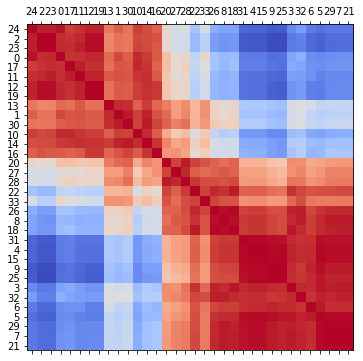

Elapsed Time


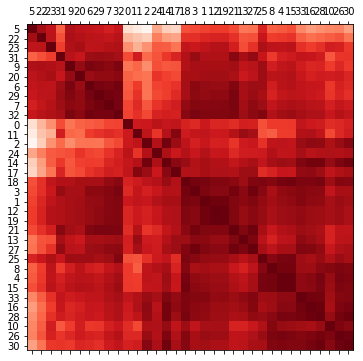

In [10]:
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

from numpy import *
from scipy import stats 

taille = len(listeVideo)

#indicesTaille = [1,2,3,11,12,13,14,15,17,18,20,24,25,31,28,29,34,21,27,23,32,33,30,26,22,19,16,4,5,6,7,8,9,10]

listeVideoTriTaille = []

for i in range(len(indicesTaille)):
    indice = indicesTaille[i]
    listeVideoTriTaille.append(listeVideo[indice])
    
corrTailleTri = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrTailleTri[i][j] = np.corrcoef(listeVideoTriTaille[i]['size'],listeVideoTriTaille[j]['size'])[0,1]


#indicesTemps = [29,31,27,17,0,15,5,16,9,11,19,28,14,26,13,2,20,4,22,33,8,7,30,10,21,25,3,18,1,12,32,24,23,6]

listeVideoTriTemps= []

for i in range(len(indicesTemps)):
    indice = indicesTemps[i]
    listeVideoTriTemps.append(listeVideo[indice])
    
        
corrTempsTri = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrTempsTri[i][j] = np.corrcoef(listeVideoTriTemps[i]['elapsedtime'],listeVideoTriTemps[j]['elapsedtime'])[0,1]

        
def plot_corr(corr,cm,ind,size=6):
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=cm)
    plt.xticks(range(len(ind)), ind)
    plt.yticks(range(len(corr.columns)), ind)
    plt.show()

print("Size")
plot_corr(pd.DataFrame(corrTailleTri),'coolwarm',indicesTaille)
print("Elapsed Time")
plot_corr(pd.DataFrame(corrTempsTri),'Reds',indicesTemps)


<font color="red" size = 5><B>Can we group inputs together? </B></font>

Classification hiérarchique, différentes distances (suite)

--

Method:	 ward


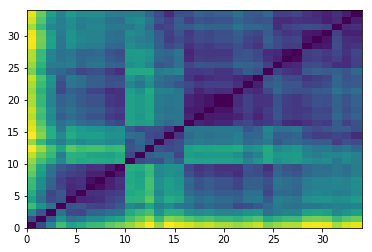

Method:	 single


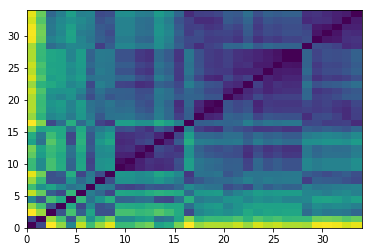

Method:	 average


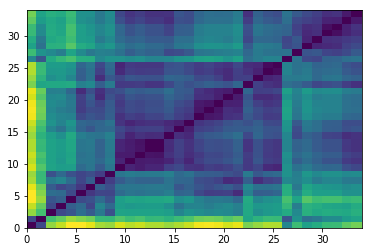

Method:	 complete


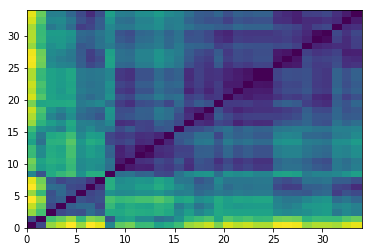

In [11]:
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage

import numpy as np
from scipy.spatial.distance import pdist, squareform, euclidean
from sklearn import datasets

import matplotlib.pyplot as plt

# https://docs.scipy.org/doc/scipy-0.14.0/reference/spatial.distance.html
# https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html
# http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software
# https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
# https://en.wikipedia.org/wiki/Correlation_clustering
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

methods = ["ward","single","average","complete"]
N = len(corrElap)
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(squareform(pdist(corrElap)),method) #hack
    
    plt.pcolormesh(ordered_dist_mat)
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.show()

<font color="red" size = 5><B>Can we group inputs together? </B></font>

Deuxième choix d'algo pour le clustering des vidéos :k-means

--

Size


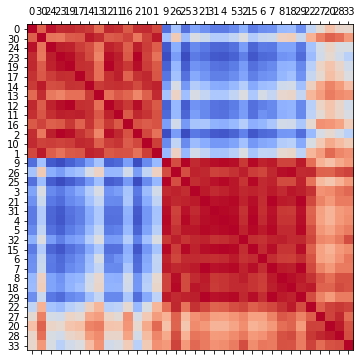

Elapsed Time


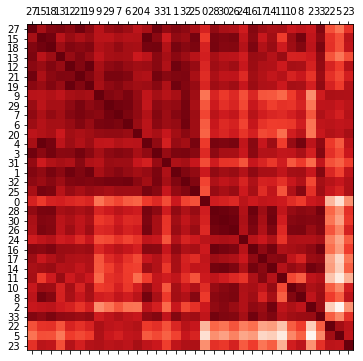

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy import stats 

kmeans = KMeans(n_clusters=3)
classes = kmeans.fit(corrTaille)
predTaille = classes.predict(corrTaille)

cat = pd.DataFrame()
cat['predTaille'] = predTaille
cat['indice'] = range(len(predTaille))

indicesTaille = np.array(cat.sort_values(by='predTaille')['indice'])

kmeans = KMeans(n_clusters=3)
classes = kmeans.fit(corrElap)
predTemps = classes.predict(corrElap)

cat['predTemps'] = predTemps

indicesTemps = np.array(cat.sort_values(by='predTemps')['indice'])

taille = len(listeVideo)

#indicesTaille = [1,2,3,11,12,13,14,15,17,18,20,24,25,31,28,29,34,21,27,23,32,33,30,26,22,19,16,4,5,6,7,8,9,10]

listeVideoTriTaille = []

for i in range(len(indicesTaille)):
    indice = indicesTaille[i]
    listeVideoTriTaille.append(listeVideo[indice])
    
corrTailleTri = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrTailleTri[i][j] = np.corrcoef(listeVideoTriTaille[i]['size'],listeVideoTriTaille[j]['size'])[0,1]


#indicesTemps = [29,31,27,17,0,15,5,16,9,11,19,28,14,26,13,2,20,4,22,33,8,7,30,10,21,25,3,18,1,12,32,24,23,6]

listeVideoTriTemps= []

for i in range(len(indicesTemps)):
    indice = indicesTemps[i]
    listeVideoTriTemps.append(listeVideo[indice])
    
        
corrTempsTri = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrTempsTri[i][j] = np.corrcoef(listeVideoTriTemps[i]['elapsedtime'],listeVideoTriTemps[j]['elapsedtime'])[0,1]

        
def plot_corr(corr,cm,ind,size=6):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        ind : number of the inputs in listeVideo
        cmap : the colors in the graphics'''
    

    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=cm)
    plt.xticks(range(len(ind)), ind)
    plt.yticks(range(len(corr.columns)), ind)
    plt.show()

print("Size")
plot_corr(pd.DataFrame(corrTailleTri),'coolwarm',indicesTaille)
print("Elapsed Time")
plot_corr(pd.DataFrame(corrTempsTri),'Reds',indicesTemps)

Le découpage avec k-means semble plus propre que la cah en terme de matrice de corrélation (reste le nombre de classes à définir, et voir si les résultats se confirment en terme de transfert de performance)

<font color="red" size = 5><B>Can we identify "cheaper" inputs? </B></font>

Admettons que les groupes soient homogènes, et qu'on ait trouvé les tranferts: le code suivant donne la vidéo la plus "cheap" par groupe

--

In [13]:
import numpy as np

# Pour chacun des groupes, on regarde si la vidéo appartient au groupe. 
# Si oui, on ajoute sa moyenne en temps écoulé à la liste
# en sortie, on donne la taille de la vidéo la plus "cheap" du groupe, 
# et l'indice de cette vidéo dans la liste initiale

nbClust = 3
listeMin = []

for k in range(nbClust):
    listeMinInter = []
    for l in range(34):
        if cat['predTaille'][l]==k:
            indice = cat['indice'][l]
            listeMinInter.append((np.mean(listeVideo[indice]['elapsedtime']),indice))
    listeMin.append(('classe '+str(k),sorted(listeMinInter)[0][0],sorted(listeMinInter)[0][1]))

print("Min par groupe de taille",listeMin)

listeMin = []

for k in range(nbClust):
    listeMinInter = []
    for l in range(34):
        if cat['predTemps'][l]==k:
            indice = cat['indice'][l]
            listeMinInter.append((np.mean(listeVideo[indice]['elapsedtime']),indice))
    listeMin.append(('classe '+str(k),sorted(listeMinInter)[0][0],sorted(listeMinInter)[0][1]))

print("Min par groupe de temps",listeMin)

Min par groupe de taille [('classe 0', 0.26838020833333326, 24), ('classe 1', 0.4477456597222223, 5), ('classe 2', 0.3487100694444447, 22)]
Min par groupe de temps [('classe 0', 0.4098263888888886, 20), ('classe 1', 0.26838020833333326, 24), ('classe 2', 0.3487100694444447, 22)]


In [14]:
# showing that some videos are equivalent (wrt configurations and correlations) and one of them is "cheaper" (execution time per configuration is less)
x = listeVideo[3]['size']
y = listeVideo[4]['size']
np.corrcoef(x, y)[0, 1], mean(listeVideo[3]['elapsedtime']), mean(listeVideo[4]['elapsedtime'])

(0.9455107808236083, 3.8139479166666694, 10.989633680555555)

<B>TODO:</B>
    
- Vérifier que les groupes sont homogènes pour un transfert optimal
- Impact des paramètres sur les groupes
- ?
    

<br/>

<font size =10><B>RQ3</B></font>

--

<font color="red" size = 5><B>Can we transfer performance predictions among inputs?</B></font>

<br/>
<B>Régression linéaire</B>

Exemple entre v1 et v5

--

Variance score: 0.90


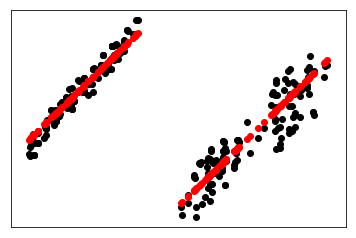

In [29]:
# transfer learning with v1 and v5 
# FIXME: plot
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

v1ID = 5
v2ID = 1
v1 = listeVideo[v1ID]
v2 = listeVideo[v2ID]

# Split the targets into training/testing sets
x_train = v1[['size', 'no_mbtree']][0:800] # .reshape(-1,2)
y_train = v2['size'][0:800]

x_test = v1[['size', 'no_mbtree']][801:1052] # .reshape(-1,2)
y_test = v2['size'][801:1052]


regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

print('Variance score: %.2f' % r2_score(y_test, y_pred))

plt.scatter(x_test['size'], y_test,  color='black')
plt.scatter(x_test['size'], y_pred,  color='red')
plt.xticks(())
plt.yticks(())
plt.show()


<font color="red" size = 5><B>Can we transfer performance predictions among inputs?</B></font>

<br/>
<B>Régression linéaire</B>

Automatisation entre toutes les vidéos, s'inspire de l'exemple ci-dessus

--

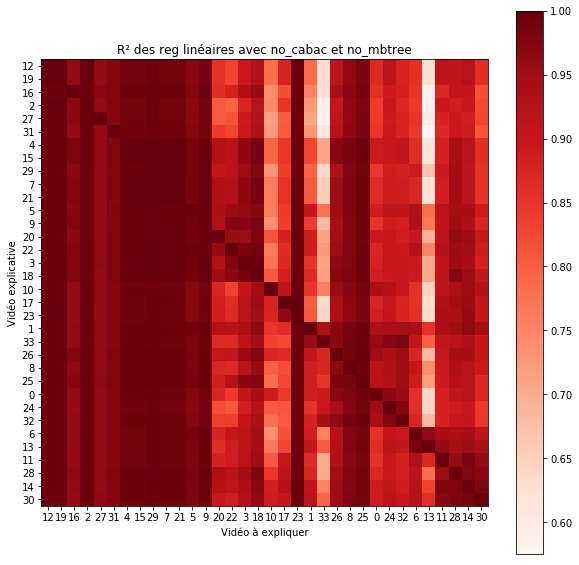

On affiche les  10  premières vidéos


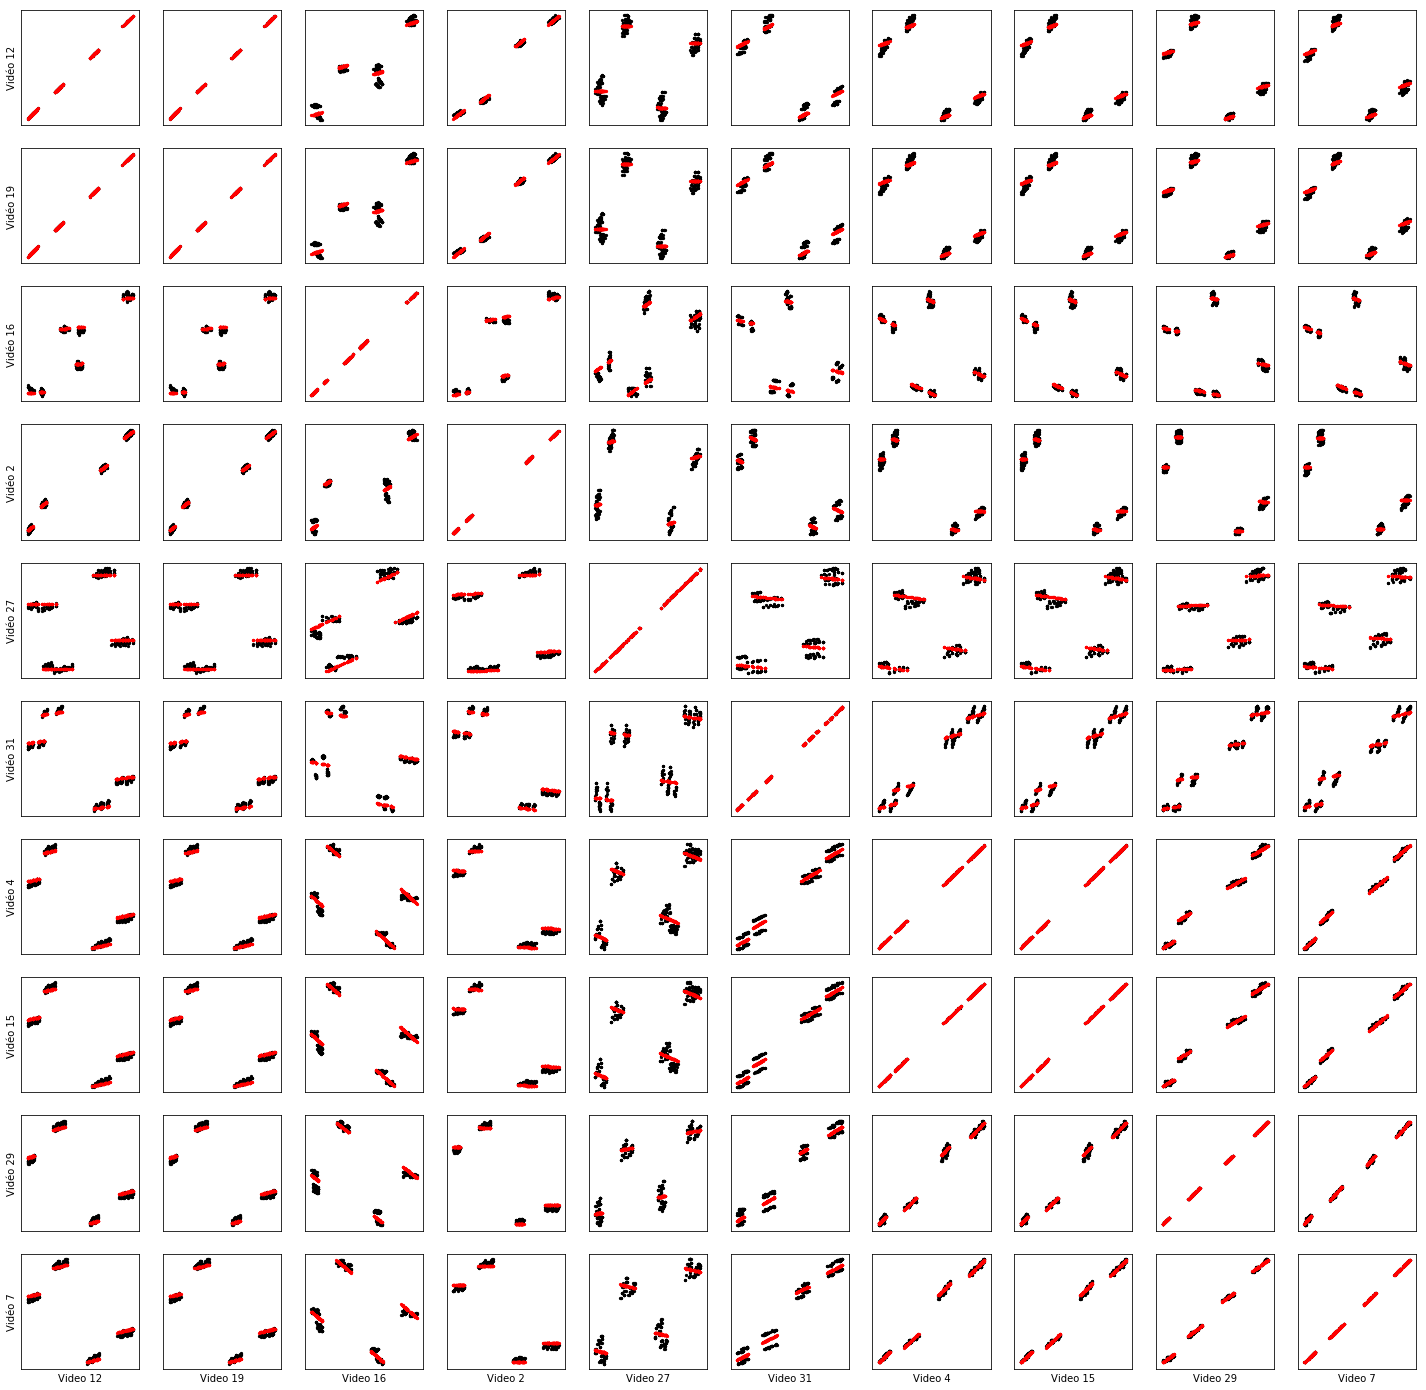

In [19]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# On essaie de regrouper les vidéos avec les rcarrés
# Rcarré = mesure de la qualité de la régression
# Donc potentiellement du bon transfert par régression linéaire

def res_reg(var,varexp1,varexp2,i,j):

    # Split the targets into training/testing sets
    x_train, x_test, y_train, y_test = train_test_split(listeVideo[i][[var, varexp1,varexp2]], 
                                                        listeVideo[j][var], test_size=0.3, random_state=0)

    # Apply the model to the training test
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    return((r2_score(y_test, y_pred),x_test[var], y_test, y_pred))

def pred_reg(var,varexp1,varexp2):

    taille = len(listeVideo)

    rCarreInter = [[0 for x in range(taille)] for y in range(taille)]
    xtestInter = [[[] for x in range(taille)] for y in range(taille)]
    ytestInter = [[[] for x in range(taille)] for y in range(taille)]
    ypredInter = [[[] for x in range(taille)] for y in range(taille)]

    for i in range(taille):
        for j in range(taille):
            r = res_reg(var,varexp1,varexp2,i,j)
            rCarreInter[i][j] = r[0]
            xtestInter[i][j] = r[1]
            ytestInter[i][j] = r[2]
            ypredInter[i][j] = r[3]


    indicesTaille = dendrogram( linkage(rCarreInter, 'average'), leaf_rotation=90.,leaf_font_size=18.,no_plot=True)['leaves']

    rCarre = [[0 for x in range(taille)] for y in range(taille)]
    xtest = [[[] for x in range(taille)] for y in range(taille)]
    ytest = [[[] for x in range(taille)] for y in range(taille)]
    ypred = [[[] for x in range(taille)] for y in range(taille)]
    
    for i in range(taille):
        for j in range(taille):
            rCarre[i][j] = rCarreInter[indicesTaille[i]][indicesTaille[j]]
            xtest[i][j] = xtestInter[indicesTaille[i]][indicesTaille[j]]
            ytest[i][j] = ytestInter[indicesTaille[i]][indicesTaille[j]]
            ypred[i][j] = ypredInter[indicesTaille[i]][indicesTaille[j]]

    plt.subplots(figsize=(10, 10))
    plt.imshow(rCarre,cmap='Reds',interpolation='nearest')
    plt.title('R² des reg linéaires avec '+str(varexp1)+' et '+str(varexp2))
    plt.xticks(range(len(indicesTaille)),indicesTaille)
    plt.yticks(range(len(indicesTaille)), indicesTaille)
    plt.xlabel("Vidéo à expliquer")
    plt.ylabel("Vidéo explicative")
    plt.colorbar()
    plt.show()


    # On regarde ensuite, pour les vidéos qui marchent bien,
    # les graphiques correspondants aux prédictions*valeurs réelles


    def plot(i,j):
        if j == 0:
            plt.ylabel("Vidéo "+str(indicesTaille[i]))
        if i == taille-1:
            plt.xlabel("Video "+str(indicesTaille[j]))
        plt.scatter(xtest[i][j], ytest[i][j], s = 5, color='black')
        plt.scatter(xtest[i][j], ypred[i][j], s = 5, color='red')
        plt.xticks(())
        plt.yticks(())


    taille = 10

    print("On affiche les ",str(taille)," premières vidéos")

    plt.subplots(nrows=taille,ncols=taille,figsize=(25, 25))

    for i in range(taille):
        for j in range(taille):
            plt.subplot(taille,taille,taille*i+j+1)
            plot(i,j)

pred_reg('size','no_cabac',"no_mbtree")

Globalement, les approximations des vidéos avec des R² forts sont plutôt bonnes. Les groupes sont différents de ceux des corrélations.

R² = 0.5843507114991738


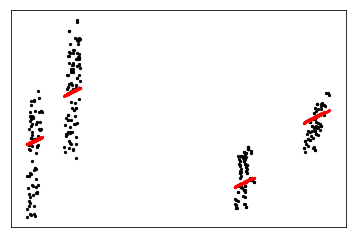

In [20]:
i = 2
j = 33
r = res_reg('size','no_cabac',"no_mbtree",i,j)

plt.scatter(r[1], r[2], s = 5, color='black')
plt.scatter(r[1], r[3], s = 5, color='red')
plt.xticks(())
plt.yticks(())

print("R² =",r[0])

En revanche, quand le R² est "bas" (~0.6), ça donne ce genre de graphique. 


Dans ce cas-là, la méthode n'est pas très efficace car la variance des clusters est trop forte, il faut complexifier le modèle. Il faut trouver un compromis, un modèle assez efficace (qui donne de bons résultats) et pas trop complexe (pour minimiser le nombre de config pour l'apprentisage)

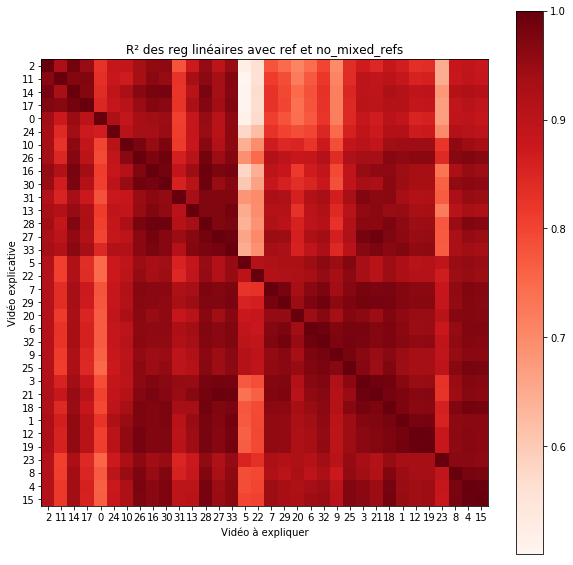

On affiche les  10  premières vidéos


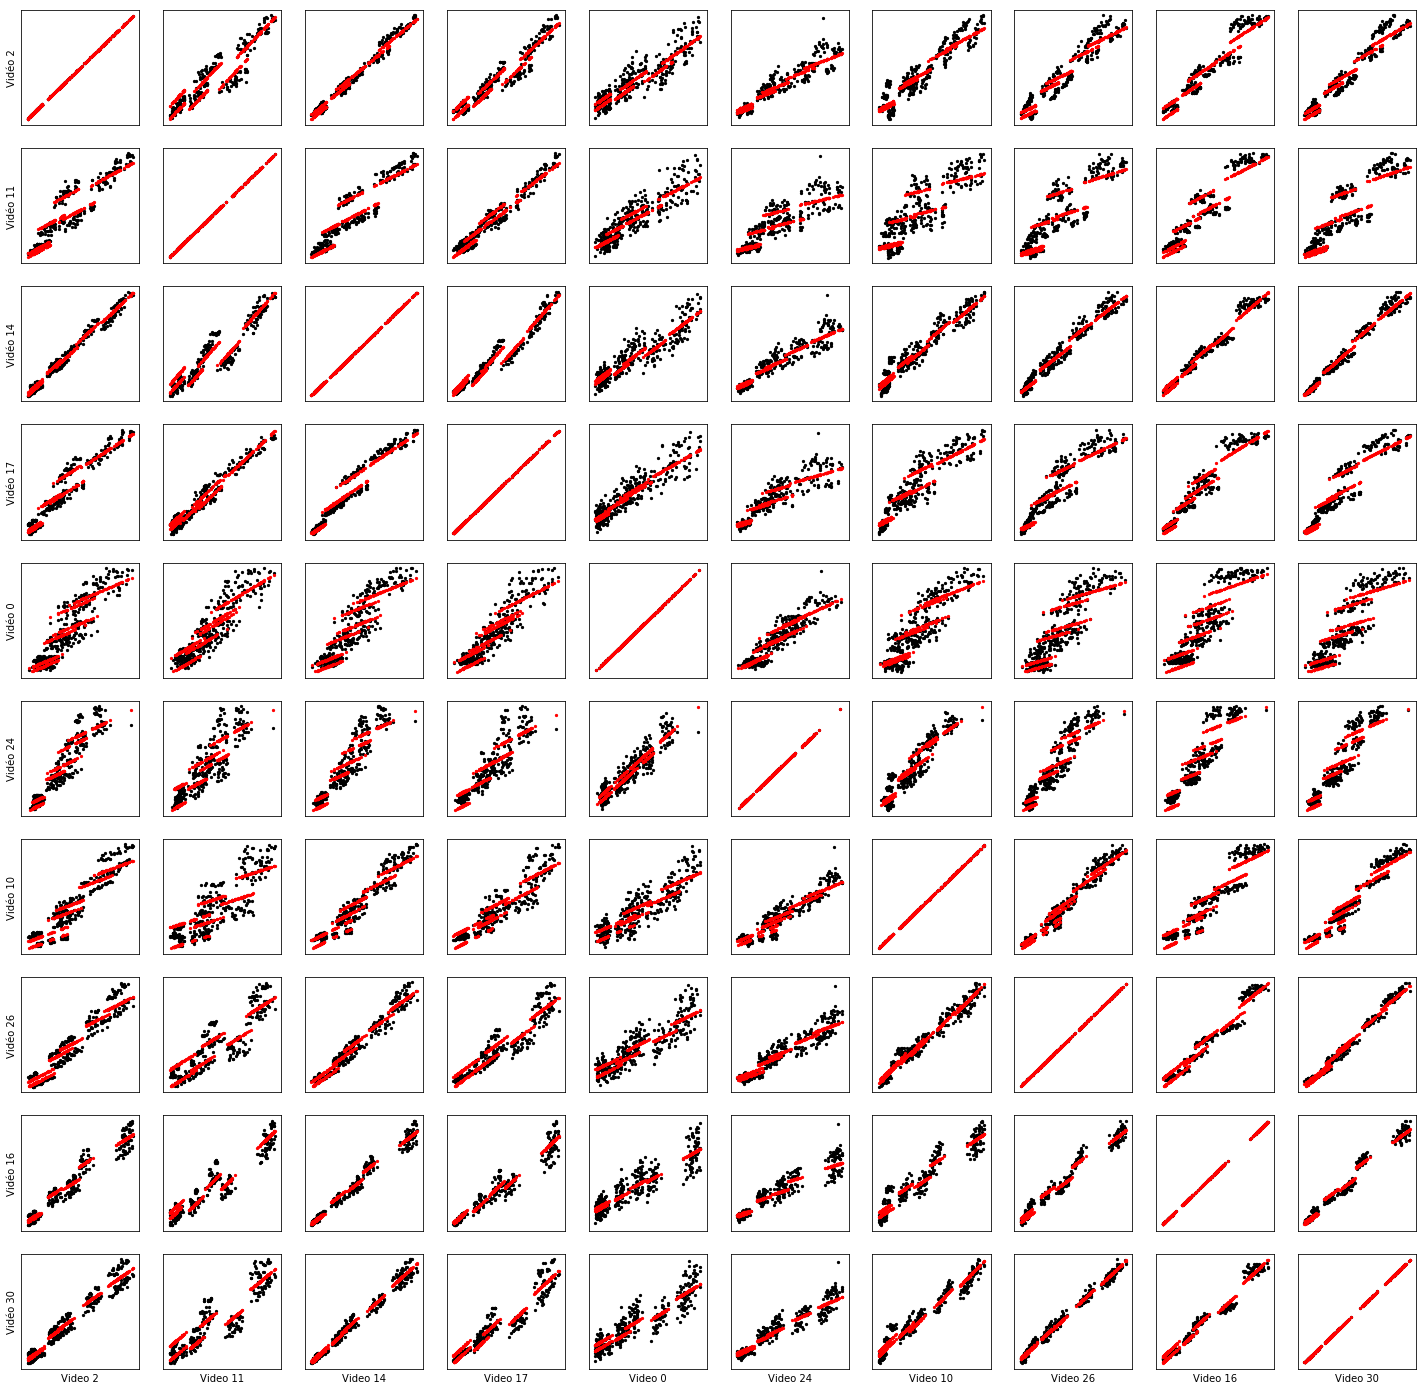

In [22]:
pred_reg('elapsedtime','ref','no_mixed_refs')

<font color="red" size = 5><B>Can we transfer performance predictions among inputs?</B></font>

<br/>

<B>Random forest</B>

Même exemple illustratif que la première méthode

--

Variance score: 0.92


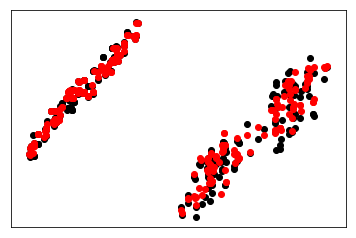

In [25]:
# transfer learning with v1 and v5 
# FIXME: plot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

v1ID = 5
v2ID = 1
v1 = listeVideo[v1ID]
v2 = listeVideo[v2ID]

# Split the targets into training/testing sets
x_train = v1[['size', 'no_mbtree','no_cabac']][0:800] # .reshape(-1,2)
y_train = v2['size'][0:800]

x_test = v1[['size', 'no_mbtree','no_cabac']][801:1052] # .reshape(-1,2)
y_test = v2['size'][801:1052]

clf = RandomForestRegressor(n_estimators=20)
clf.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = clf.predict(x_test)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

plt.scatter(x_test['size'], y_test,  color='black')
plt.scatter(x_test['size'], y_pred,  color='red')
plt.xticks(())
plt.yticks(())
plt.show()


On sent que le RF est plus précis que la régression simple, les nuages sont approximés au plus proches et pas par une affine.

<font color="red" size = 5><B>Can we transfer performance predictions among inputs?</B></font>

<br/>
<B>Random Forest</B>

Automatisation entre toutes les vidéos, s'inspire du premier exemple

--

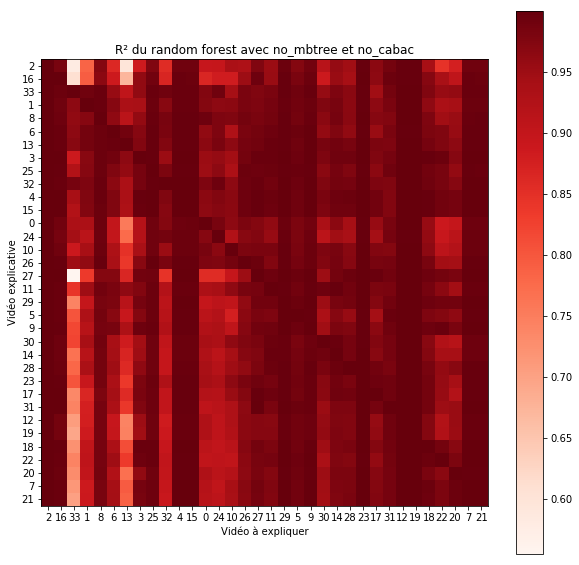

On affiche les  10  premières vidéos


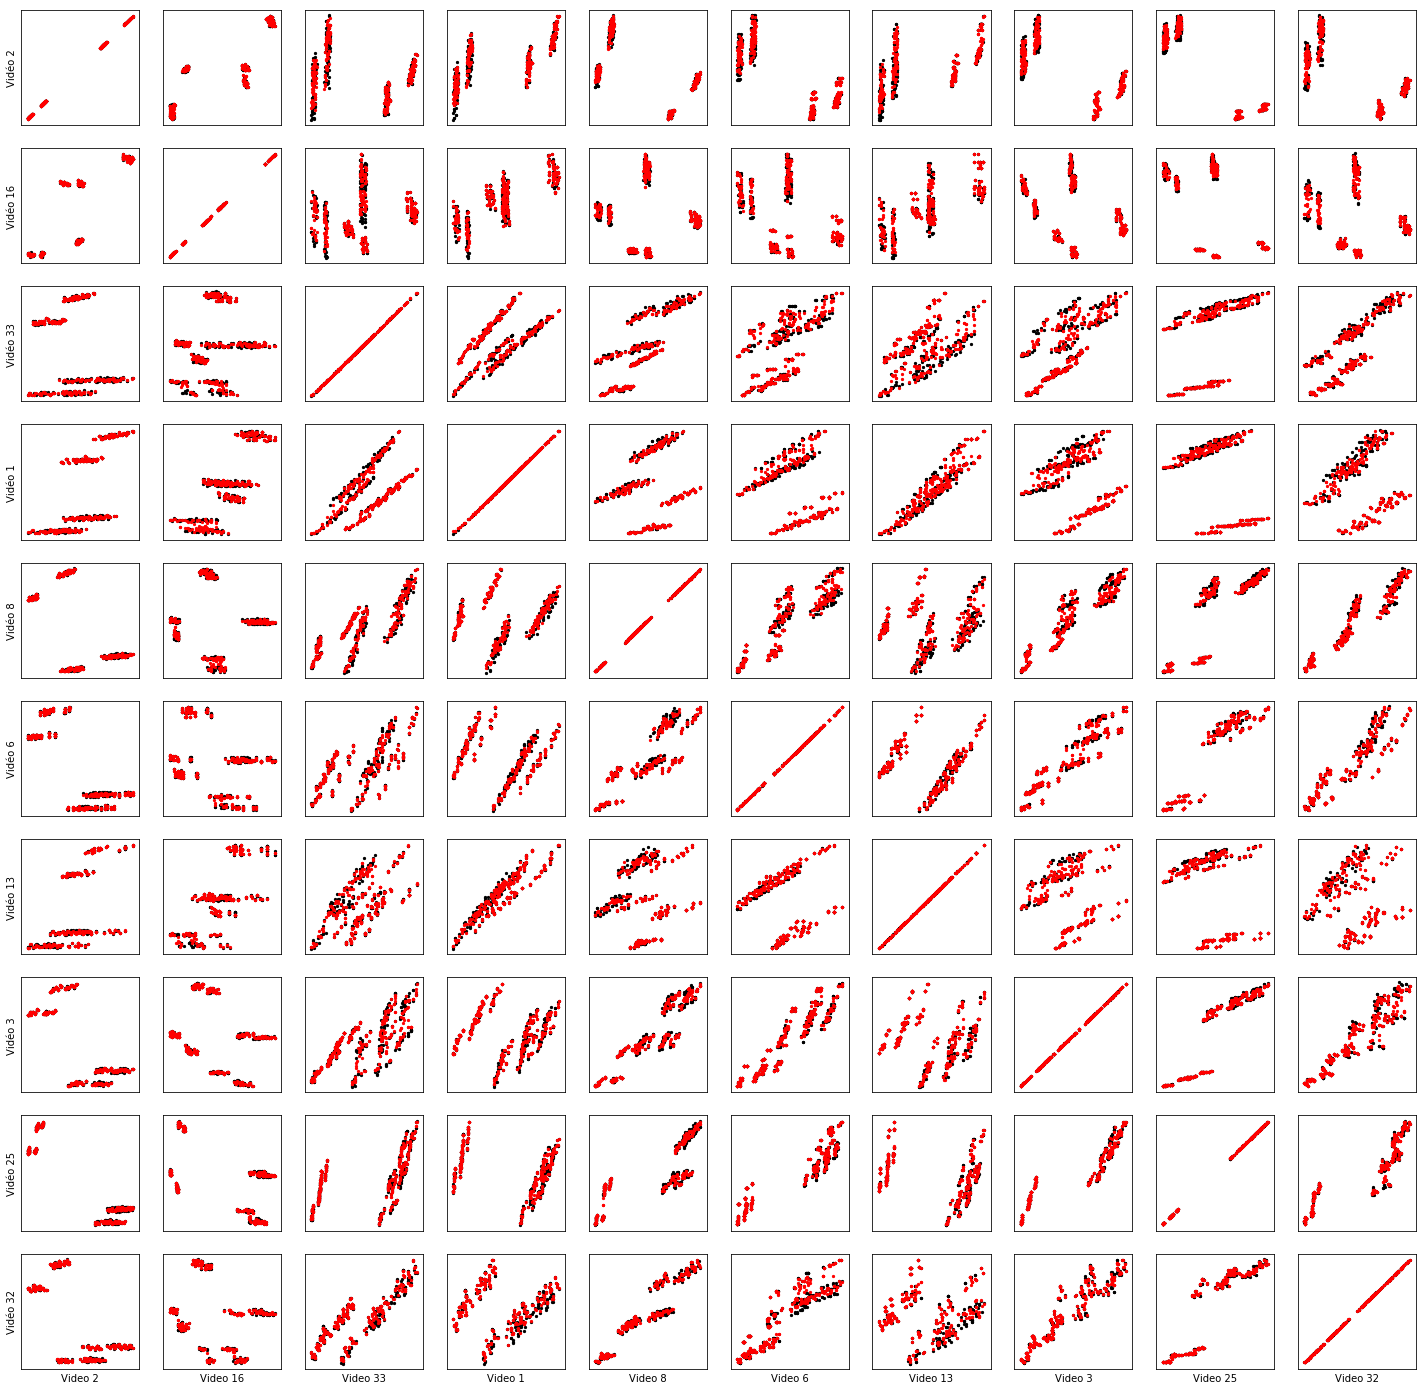

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# On essaie de regrouper les vidéos avec les rcarrés
# Rcarré = mesure de la qualité de la régression
# Donc potentiellement du bon transfert par régression linéaire

def res_rf(var,varexp1,varexp2,i,j):

    # Split the targets into training/testing sets
    x_train, x_test, y_train, y_test = train_test_split(listeVideo[i][[var, varexp1,varexp2]], 
                                                        listeVideo[j][var], test_size=0.3, random_state=0)

    # Apply the model to the training test

    clf = RandomForestRegressor(n_estimators=20)
    clf.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = clf.predict(x_test)

    return((r2_score(y_test, y_pred),x_test[var], y_test, y_pred))

def pred_rf(var,varexp1,varexp2):

    taille = len(listeVideo)

    rCarreInter = [[0 for x in range(taille)] for y in range(taille)]
    xtestInter = [[[] for x in range(taille)] for y in range(taille)]
    ytestInter = [[[] for x in range(taille)] for y in range(taille)]
    ypredInter = [[[] for x in range(taille)] for y in range(taille)]

    for i in range(taille):
        for j in range(taille):
            r = res_rf(var,varexp1,varexp2,i,j)
            rCarreInter[i][j] = r[0]
            xtestInter[i][j] = r[1]
            ytestInter[i][j] = r[2]
            ypredInter[i][j] = r[3]


    indicesTaille = dendrogram( linkage(rCarreInter, 'average'), leaf_rotation=90.,leaf_font_size=18.,no_plot=True)['leaves']

    rCarre = [[0 for x in range(taille)] for y in range(taille)]
    xtest = [[[] for x in range(taille)] for y in range(taille)]
    ytest = [[[] for x in range(taille)] for y in range(taille)]
    ypred = [[[] for x in range(taille)] for y in range(taille)]
    
    for i in range(taille):
        for j in range(taille):
            rCarre[i][j] = rCarreInter[indicesTaille[i]][indicesTaille[j]]
            xtest[i][j] = xtestInter[indicesTaille[i]][indicesTaille[j]]
            ytest[i][j] = ytestInter[indicesTaille[i]][indicesTaille[j]]
            ypred[i][j] = ypredInter[indicesTaille[i]][indicesTaille[j]]

    plt.subplots(figsize=(10, 10))
    plt.imshow(rCarre,cmap='Reds',interpolation='nearest')
    plt.title('R² du random forest avec no_mbtree et no_cabac')
    plt.xticks(range(len(indicesTaille)),indicesTaille)
    plt.yticks(range(len(indicesTaille)), indicesTaille)
    plt.xlabel("Vidéo à expliquer")
    plt.ylabel("Vidéo explicative")
    plt.colorbar()
    plt.show()


    # On regarde ensuite, pour les vidéos qui marchent bien,
    # les graphiques correspondants aux prédictions*valeurs réelles


    def plot(i,j):
        if j == 0:
            plt.ylabel("Vidéo "+str(indicesTaille[i]))
        if i == taille-1:
            plt.xlabel("Video "+str(indicesTaille[j]))
        plt.scatter(xtest[i][j], ytest[i][j], s = 5, color='black')
        plt.scatter(xtest[i][j], ypred[i][j], s = 5, color='red')
        plt.xticks(())
        plt.yticks(())


    taille = 10

    print("On affiche les ",str(taille)," premières vidéos")

    plt.subplots(nrows=taille,ncols=taille,figsize=(25, 25))

    for i in range(taille):
        for j in range(taille):
            plt.subplot(taille,taille,taille*i+j+1)
            plot(i,j)

pred_rf('size','no_cabac','no_mbtree')

Le RF est bien plus long en terme d'apprentissage, mais nettement plus efficace en terme de R², la matrice est vraiment très proche de la matrice parfaite. PLus important, pour chacune des vidéos peut-être expliquée par une autre vidéo.

Pour valider la méthode, il peut être intéressant de:
- diminuer la taille de l'apprentissage -> si les nouvelles vidéos ont peu de config testées, on peut tout de même prévoir leur taille
- diminuer le nombre d'arbres (avec 100, c'est franchement long pour une trentaine de vidéos, 20 c'est correct)
 

R² = 0.5861928314404279


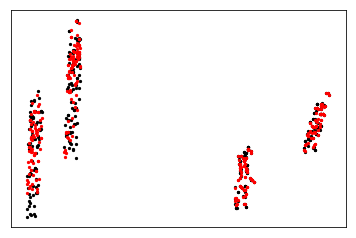

In [26]:
i = 2
j = 33
r = res_rf('size','no_cabac','no_mbtree',i,j)

plt.scatter(r[1], r[2], s = 5, color='black')
plt.scatter(r[1], r[3], s = 5, color='red')
plt.xticks(())
plt.yticks(())

print("R² =",r[0])

Sur cet exemple, c'est très clair: R² équivalents, mais RF > reg pour la taille car plus représentatif

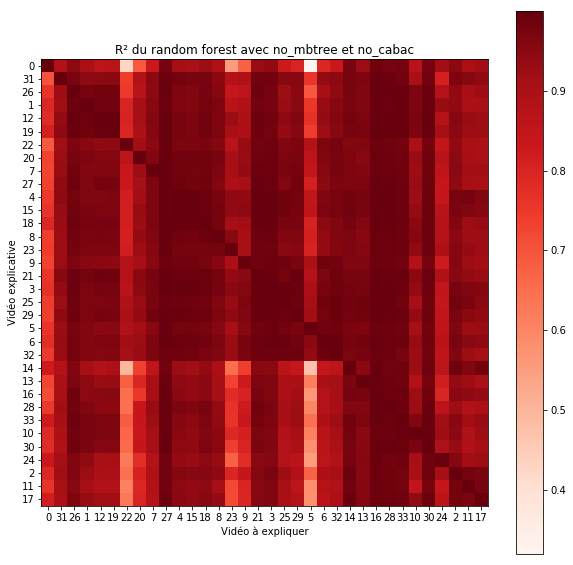

On affiche les  10  premières vidéos


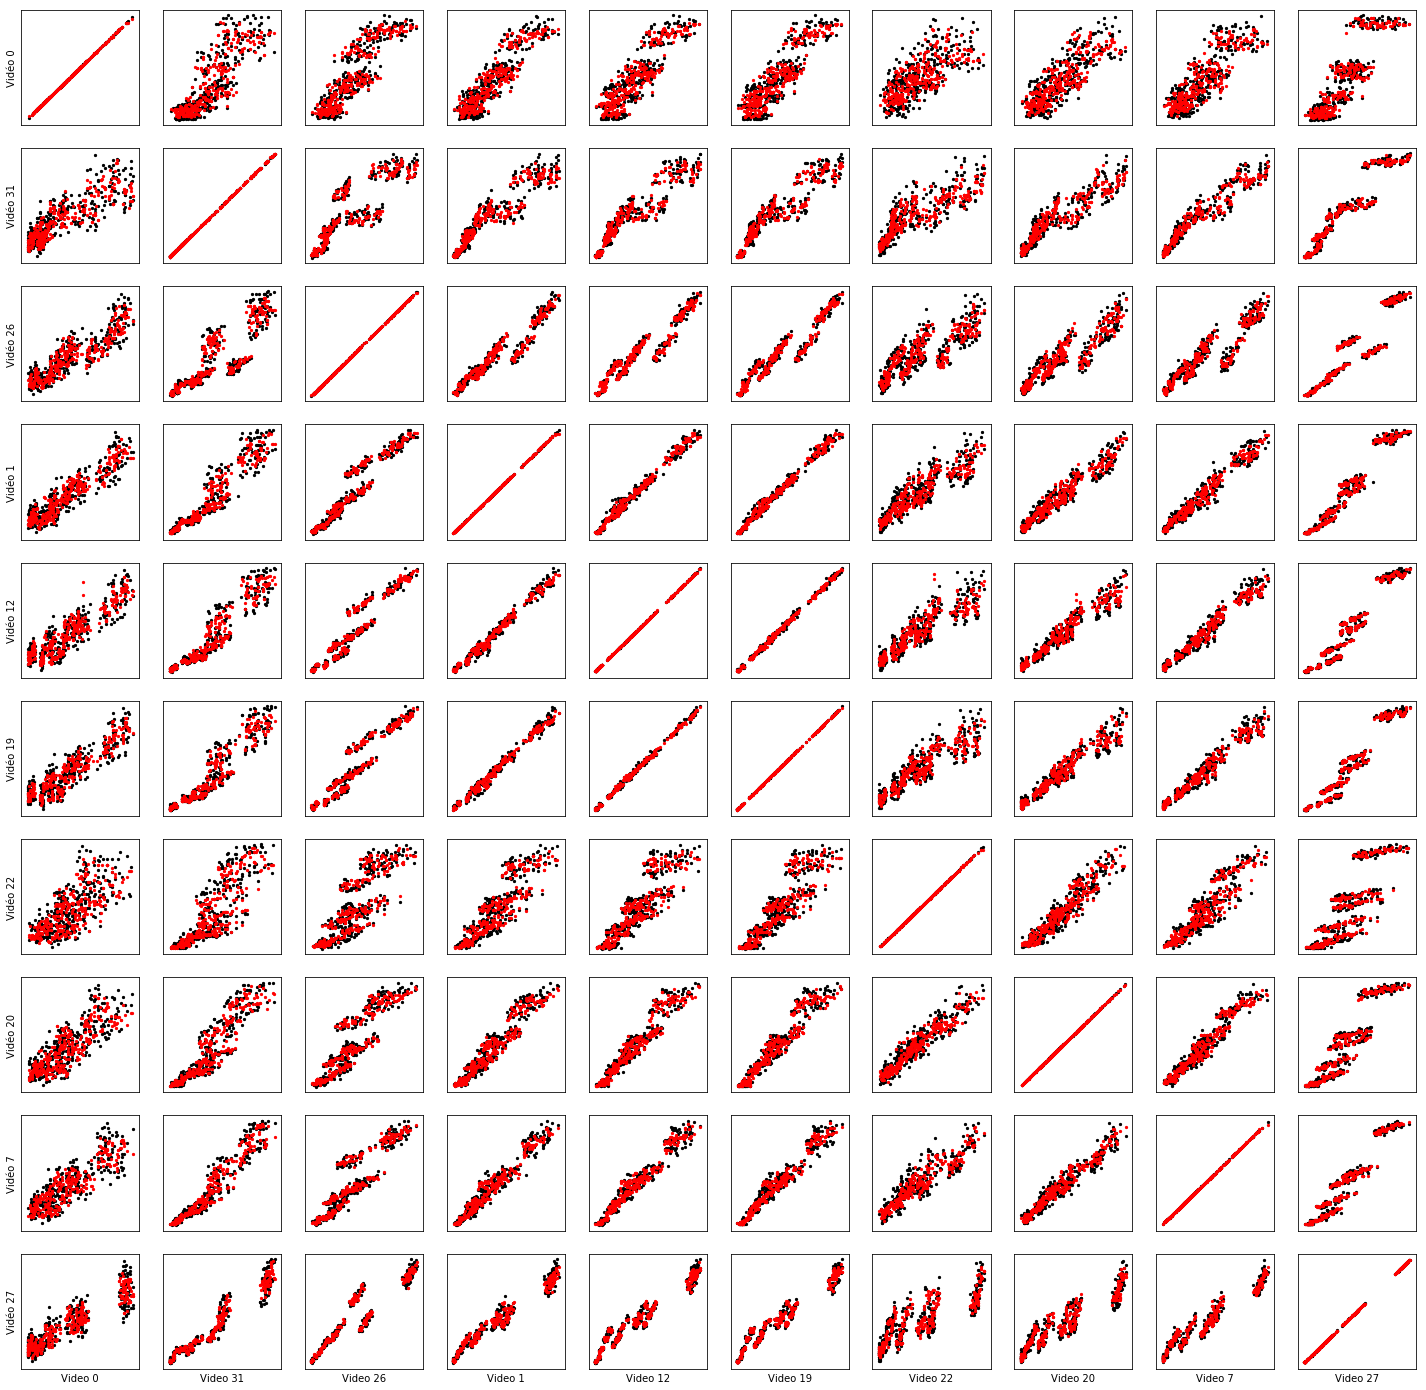

In [27]:
pred_rf('elapsedtime','ref','no_mixed_refs')

En revanche, le modèle peut être amélioré en terme de temps écoulé. En terme de transfert, aucune vidéo n'explique correctement la vidéo 0, ce qui ruine un peu l'hypothèse du groupement de vidéos.

Plusieurs pistes de réflexion:
- augmenter le nombre d'arbres, et attendre
- rajouter un paramètre de la bdd (cf l'histogramme de "Do inputs change the influential options?", soit 8*8 soit ref)
- Trouver un modèle plus performant que le rf

<font color="red" size = 5><B>Can we transfer performance predictions among inputs?</B></font>

<br/>
<B>Méthode de Pavlov</B>

--

<B>En résumé :</B>
<I>Taille</I>
- la régression linéaire size + no_cabac + donne des résultats corrects, c'est une méthode rapide pour obtenir des premiers résultats. Mais certaines vidéos montrent les limites du modèle.
- le rf est long, mais donne des résultats très bons, meilleurs que la rég + 2 param. Couplés avec du groupement, une méthode sans doute très efficace.

<I>Temps écoulé</I>
- la régression + 2 param est moins indiquée que pour la taille, qui contrairement au temps linéaire, forme des clusters de paramètres. Certaines vidéos semblent totalement décorrelées, presque pas de transfert.
- même le rf ne donne pas de très bons résultats sur le temps écoulé
- une meilleure méthode doit être trouvée

<B> TODO :</B>
- Comprendre les fonctions en dessous
- Trouver les fonctions de transfert les plus efficaces (par groupe? cf Pavlov?)
- ?

<font color="red" size = 5><B>Fonctions sur le transfert</B></font>

à comprendre

--

,size
0,1290016
1,1407335
2,1442216
3,1511158
4,1421425
5,1488528
6,1441000
7,1527852
8,1405923
9,1333677


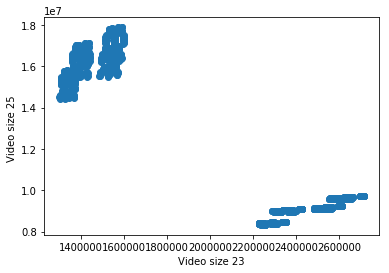

In [17]:
# transfer learning with v1 and v5 
# FIXME: plot
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

def plotCorrVideo(v1ID, v2ID,predDimension='size',plot=True):
    v1 = listeVideo[v1ID][predDimension]
    v2 = listeVideo[v2ID][predDimension]
    if plot:
        plt.figure()
        plt.scatter(v1,v2)
        plt.xlabel("Video %s %d" % (predDimension, v1ID))
        plt.ylabel("Video %s %d " % (predDimension, v2ID))
    return np.corrcoef(v1,v2)[0,1]
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html
# seeking where the lowest correlation occurs (btw 2 videos)
np.unravel_index(np.argmin(corrTaille,axis=None), np.array(corrTaille).shape)
plotCorrVideo(23, 25)

def transferReg(v1ID, v2ID, perc):
    v1 = listeVideo[v1ID]
    v2 = listeVideo[v2ID]
    
    nTotal = len(v1['size'])
    tres = round(perc * nTotal)
    
    # Split the targets into training/testing sets
    x_train = v1[['size', 'no_mbtree', 'no_cabac']][0:tres] #.values.reshape(-1,1)
    y_train = v2['size'][0:tres]#.values.reshape(-1,1)
    
    x_test = v1[['size', 'no_mbtree', 'no_cabac']][tres+1:nTotal]#.values.reshape(-1,1)
    y_test = v2['size'][tres+1:nTotal]#.values.reshape(-1,1)

        

    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)


    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
         % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    print('Relative score: %.2f' % mean_relative_error(y_test, y_pred))
    
    plt.figure()
    # plt.scatter(x_train['size'], y_train,  color='red')
    plt.scatter(x_test['size'], y_test,  color='black')
    plt.scatter(x_test['size'], y_pred,  color='red')
    #plt.plot(x_test['size'], y_predict2, color='blue')

    plt.xticks(())
    plt.yticks(())

    plt.show()
    
def linearReg(v1ID, perc):
    v1 = listeVideo[v1ID]    
    nTotal = len(v1['size'])
    tres = round(perc * nTotal)   


    # Split the targets into training/testing sets
    x_train = v1[['no_mbtree', 'no_cabac']][0:tres] #.values.reshape(-1,1)
    y_train = v1['size'][0:tres]#.values.reshape(-1,1)
    
    x_test = v1[['no_mbtree', 'no_cabac']][tres+1:nTotal]#.values.reshape(-1,1)
    y_test = v1['size'][tres+1:nTotal]#.values.reshape(-1,1)

        

    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)


    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
         % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    print('Relative score: %.2f' % mean_relative_error(y_test, y_pred))


N = 16 
# transferReg(1, 5, (N / 1152)) # great achievement!


def computeTransferAndReg(vid1,vid2):
    print("Video %d vs %d" % (vid1,vid2))
    cor12 = plotCorrVideo(vid1,vid2)
    print("Correlation %.2f" % (cor12))
    print("Transfer learning...")
    transferReg(vid1, vid2, (N / 1152)) 
    print("Simple regression linear model (to check if it is that simple) for source video %d" % (vid1))
    linearReg(vid1, (N / 1152))
    print("Simple regression linear model (to check if it is that simple) for target video %d" % (vid2))
    linearReg(vid2, (N / 1152))
    # TODO: tree learning over vid1
    
    


# print("Correlation %.2f" % (plotCorrVideo(1,2)))
# transferReg(1, 2, (N / 1152)) # great achievement!

#linearReg(5, (N / 1152))
#linearReg(1, (N / 1152))
#linearReg(3, (N / 1152))
#transferReg(1, 3, (N / 1152))
#for i in range(0,len(listeVideo)):
 #   for j in range(0,len(listeVideo)):
  #      computeTransferAndReg(i, j)

#%%capture
# transfer learning 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


## Domain knowledge for transfer function
def mkFeatures2Focus(predDimension):
    possibleColumns=['idVideo','no_8x8dct','no_asm','no_cabac',
                           'no_deblock','no_fast_pskip','no_mbtree',
                           'no_mixed_refs','no_weightb','rc_lookahead','ref']
    ftToFocus = []
    if predDimension == 'size':
        ftToFocus = [] # ['no_mbtree', 'no_cabac']
    elif predDimension == 'elapsedtime':
        ftToFocus = [] # ['ref', 'no_mixed_refs', 'no_mbtree'] # []
    else:
        print("Error: predDimension is either size or elapsedtime")
    return ftToFocus

def evalPrediction(y_gtruth, y_pred):
     # The mean squared error
    mse = mean_squared_error(y_gtruth, y_pred)
   # print("Mean squared error: %.2f" % mse)
    # Explained variance score: 1 is perfect prediction
    r2 = r2_score(y_gtruth, y_pred)
   # print('Variance score: %.2f' % r2)   
    mre = mean_relative_error(y_gtruth, y_pred)
   # print('Relative score: %.2f' % mre)
    return mse, r2, mre

def transferReg(v1ID, v2ID, perc, predDimension='size'):
    vSource = listeVideo[v1ID]
    vTarget = listeVideo[v2ID]
    
    nTotal = len(vSource[predDimension]) # length is equal between vSource and vTarget (1052 in our experiments)
    tres = round(perc * nTotal)
    
    ######### pure learnning over target (it's the traditional way, without transfer)  ##########  
    clfTarget = RandomForestRegressor(n_estimators=100)  
    
    # train sample 
    x_target_train = vTarget[0:tres] # Cs
    x_effective_target_train = x_target_train.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
    # x_effective_target_train = x_effective_target_train[['no_mbtree', 'no_cabac']] 
    y_target_train = vTarget[predDimension][0:tres] 
    clfTarget.fit(x_effective_target_train, y_target_train) 
    
    # test sample for evaluating 
    x_target_test = vTarget[tres+1:nTotal]
    x_effective_target_test = x_target_test.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
    # x_effective_source_test = x_effective_source_test[['no_mbtree', 'no_cabac']]
    y_target_test = vTarget[predDimension][tres+1:nTotal]
    
   # print("** Evaluation of learning model (for the TARGET, without transfer)**")
    y_target_pred = clfTarget.predict(x_effective_target_test)
    mseMLTarget, r2MLTarget, mreMLTarget = evalPrediction(y_target_test, y_target_pred)
   
    
    #### Now let's try ML + Transfer
    
    ######### first, we need a learning model for predicting size (source), hopefully very accurate ##########  
    clf = RandomForestRegressor(n_estimators=100)    
    x_source_train = vSource[0:tres] # Cs
    x_effective_source_train = x_source_train.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
    # x_effective_source_train = x_effective_source_train[['no_mbtree', 'no_cabac']] 
    y_source_train = vSource[predDimension][0:tres] 
    clf.fit(x_effective_source_train, y_source_train) # RT
    
    # intermediate evaluation of learning model
    x_source_test = vSource[tres+1:nTotal]
    x_effective_source_test = x_source_test.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1) # normally we learn over the full parameters but we can try to target specifically ['no_mbtree', 'no_cabac']
   # x_effective_source_test = x_effective_source_test[['no_mbtree', 'no_cabac']]
    y_source_test = vSource[predDimension][tres+1:nTotal]
    
    y_source_pred = clf.predict(x_effective_source_test)
  #  print("** Intermediate evaluation of learning model for the SOURCE hopefully very accurate **")
    mseMLSource, r2MLSource, mreMLSource = evalPrediction(y_source_test, y_source_pred)    

    ####### second, let's learn the transfer function between source and target ############
    ftsToFocus = mkFeatures2Focus(predDimension)
    ftsToFocus.append(predDimension)
  
    
    x_transfer_train = x_source_train[ftsToFocus] # source [['size', 'no_mbtree', 'no_cabac']]
    y_transfer_train = vTarget[predDimension][0:tres] # Cboth (target)
    regr = linear_model.LinearRegression() # linear_model.BayesianRidge() # linear_model.LinearRegression() # linear_model.Ridge (alpha = .5) 
    regr.fit(x_transfer_train, y_transfer_train)  
    # The coefficients
  #  print('Coefficients: \n', regr.coef_)      
    ##### evaluation is really intermediate here, 
    ##### it is mostly here to have an idea on the quality of the transfer function (it does not combine learning + transf)
    # now let's evaluate that our transfer model works over a testing sample  
    #x_test = vSource[tres+1:nTotal]
    #x_effective_test = x_test.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1)
    #x_test =  x_test [['no_mbtree', 'no_cabac']]
    #y_test = vTarget[predDimension][tres+1:nTotal] #  # 
    #y_reg_pred = regr.predict(x_test[[predDimension, 'no_mbtree', 'no_cabac']])
    #print("*** Assesment of linear regression (once size has been learned, intermediate result) ***")
    #mseReg = mean_squared_error(y_test, y_reg_pred)
    #print("Mean squared error: %.2f" % (mseL))
    # Explained variance score: 1 is perfect prediction
    #r2Reg = r2_score(y_test, y_reg_pred)
    #print('Variance score: %.2f' % (r2L))
    #mreReg = mean_relative_error(y_test, y_reg_pred)
    #print('Relative score: %.2f' % mreReg)
    #plt.figure()
    # plt.scatter(x_train['size'], y_train,  color='red')
    #plt.scatter(x_test[predDimension], y_test,  color='black')
    #plt.scatter(x_test[predDimension], y_reg_pred,  color='red')
    #plt.plot(x_test['size'], y_predict2, color='blue')
    #plt.xticks(())
    #plt.yticks(())
    #plt.show()
    #print("*** ***")
       
    
    ########### third, transfer + learning  
    x_test = vTarget[tres+1:nTotal]
    x_effective_test = x_test.drop(['configurationID', 'size', 'elapsedtime', 'systemtime', 'usertime'], axis=1)
    target_prediction_size = clf.predict(x_effective_test)
    #x_test =  x_test [['no_mbtree', 'no_cabac']]
    # print("Unique prediction values %d" % (len(np.unique(target_prediction_size))))
    # add predicted size to x_test
    x_augmented_test = x_effective_test.assign(predDimension=target_prediction_size) 
    x_augmented_test = x_augmented_test.rename(columns={'predDimension': predDimension}) # WEIRD (TODO)
    y_test = y_target_test # vTarget[predDimension][tres+1:nTotal] #  #     
    # Make predictions using the testing set
    y_pred = regr.predict(x_augmented_test[ftsToFocus])

 #   print("*** Learning + transfer")
    mseMLT, r2MLT, mreMLT = evalPrediction(y_test, y_pred)
    
    #plt.figure()
    # plt.scatter(x_train['size'], y_train,  color='red')
    #plt.scatter(x_augmented_test[predDimension], y_test,  color='black')
    #plt.scatter(x_augmented_test[predDimension], y_pred,  color='red')
    #plt.plot(x_test['size'], y_predict2, color='blue')

    #plt.xticks(())
    #plt.yticks(())

    #plt.show()
    # (mseMLSource, r2MLSource, mreMLSource), 
    return (mseMLTarget, r2MLTarget, mreMLTarget), (mseMLT, r2MLT, mreMLT)
   
## Deprecated 
def linearReg(v1ID, perc, predDimension='size'):
    v1 = listeVideo[v1ID]    
    nTotal = len(v1[predDimension])
    tres = round(perc * nTotal)   


    # Split the targets into training/testing sets
    x_train = v1[['no_mbtree', 'no_cabac']][0:tres] #.values.reshape(-1,1)
    y_train = v1[predDimension][0:tres]#.values.reshape(-1,1)
    
    x_test = v1[['no_mbtree', 'no_cabac']][tres+1:nTotal]#.values.reshape(-1,1)
    y_test = v1[predDimension][tres+1:nTotal]#.values.reshape(-1,1)
    
    #print(np.unique(y_test))

    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    
    #print(np.unique(y_pred))
    
    #plt.figure()
    #plt.scatter(y_test, y_test,  color='black')
    #plt.scatter(y_pred, y_pred,  color='red')
    #plt.scatter(x_augmented_test[predDimension], y_test,  color='black')
    #plt.scatter(x_augmented_test[predDimension], y_pred,  color='red')
    #plt.plot(x_test['size'], y_predict2, color='blue')

    #plt.xticks(())
    #plt.yticks(())

    #plt.show()


    # The coefficients
    print('Coefficients: \n', regr.coef_)
    mreReg, r2Reg, mseReg = evalPrediction(y_test, y_pred)
    return (mreReg, r2Reg, mseReg)

def linearRegBetweenVideos(v1Source, v2Target, perc, predDimension='size'):
    vSource = listeVideo[v1Source]  
    vTarget = listeVideo[v2Target]  
    nTotal = len(vSource[predDimension])
    tres = round(perc * nTotal)   
    
    ftToFocus = mkFeatures2Focus(predDimension)
    ftToFocus.append(predDimension)

    # Split the targets into training/testing sets
    x_train = vSource[ftToFocus][0:tres] #.values.reshape(-1,1)
    y_train = vTarget[predDimension][0:tres]#.values.reshape(-1,1)
    
    x_test = vSource[ftToFocus][tres+1:nTotal]#.values.reshape(-1,1)
    y_test = vTarget[predDimension][tres+1:nTotal]#.values.reshape(-1,1)
    
    #print(np.unique(y_test))

    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    
    #print(np.unique(y_pred))
    
    #plt.figure()
    #plt.scatter(y_test, y_test,  color='black')
    #plt.scatter(y_pred, y_pred,  color='red')
    #plt.scatter(x_augmented_test[predDimension], y_test,  color='black')
    #plt.scatter(x_augmented_test[predDimension], y_pred,  color='red')
    #plt.plot(x_test['size'], y_predict2, color='blue')

    #plt.xticks(())
    #plt.yticks(())

    #plt.show()


    # The coefficients
   # print('Coefficients: \n', regr.coef_)
    mreReg, r2Reg, mseReg = evalPrediction(y_test, y_pred)
    return (mreReg, r2Reg, mseReg)

# transferReg(1, 5, (N / 1152)) # great achievement!

N = 16

def computeTransferAndReg(vid1,vid2,n=16,predDimension='size'):
    print("Video %d vs %d" % (vid1,vid2));
    cor12 = plotCorrVideo(vid1,vid2,predDimension,False)
    #print("Correlation %.2f" % (cor12))
   # print("Transfer learning...")
    mreL, mreT = transferReg(vid1, vid2, (n / 1152), predDimension) 
    #print("Simple regression linear model (to check if it is that simple) for source video %d" % (vid1))
    mre1 = linearRegBetweenVideos(vid1, vid2, (n / 1152), predDimension)
    #print("Simple regression linear model (to check if it is that simple) for target video %d" % (vid2))
    mre2 = linearRegBetweenVideos(vid2, vid1, (n / 1152), predDimension)
    return mreL, mreT, mre1, mre2
    # TODO: tree learning over vid1
    
    


# print("Correlation %.2f" % (plotCorrVideo(1,2)))
# transferReg(1, 2, (N / 1152)) # great achievement!

#linearReg(5, (N / 1152))
#linearReg(1, (N / 1152))
#linearReg(3, (N / 1152))
#transferReg(1, 3, (N / 1152))


# transferReg(1, 5, (5*N / 1152)) # 
# transferReg(5, 1, (3*N / 1152)) # great achievement!
#mreL, mreT, mre1, mre2 = computeTransferAndReg(33, 18, n=10*N, predDimension='elapsedtime') 

def computeRegs(vid1,vid2,n=16,predDimension='size'):
    print("Video %d vs %d" % (vid1,vid2))
    print("Simple regression linear model (to check if it is that simple) for source video %d" % (vid1))
    mre1 = linearRegBetweenVideos(vid1, vid2, (n / 1152), predDimension)
    print("Simple regression linear model (to check if it is that simple) for target video %d" % (vid2))
    mre2 = linearRegBetweenVideos(vid2, vid1, (n / 1152), predDimension)
    return mre1, mre2

def launchRegExperiment(predDimension='size'):
    mreAllReg = []
    for nSample in Nf:    
        mres = []
        print("#######\t Nf=%d \t\t#########" % (nSample))
        for i in range(0,len(listeVideo)):        
            for j in range(0,len(listeVideo)):
                if i == j:
                    continue 
                mre1, mre2 = computeRegs(i, j, n=nSample*N, predDimension=predDimension)
                # print("\t MRE learning %.2f MRE transfer %.2f MRE reg %.2f MRE reg %.2f" % (mreL, mreT, mre1, mre2))
                # print("\n\n\n")
                mres.append((mre1, mre2))
        mreAllReg.append(mres)
    return mreAllReg

def analyzeRegAccuracies(nnf, mres):
    mres = mres[nnf] 
    mreReg1 = [] 
    mreReg2 = []
    for i in range(len(mres)):
        mre = mres[i]
        mreReg1.append(mre[0])
        mreReg2.append(mre[1])
    pdReg1 = pd.DataFrame(mreReg1)
    pdReg2 = pd.DataFrame(mreReg2)
    print("Reg1 %s" % (pdReg1.describe()))
    print("Reg2 %s" % (pdReg2.describe()))
    print("Reg1 vs Reg2 %s" % (pdReg2.subtract(pdReg1).describe()))

#mreAllReg = launchRegExperiment('elapsedtime')
#for i in range(len(Nf)):
   # print("For sampling size: %d" % (Nf[i] * N))
    #analyzeRegAccuracies(i, mreAllReg)
    #print("*****\n\n")

    Nf = [3] # [1, 2, 3, 4, 5, 10]

def launchExperiment(predDimension):
    mreAll = []
    for nSample in Nf:    
        mres = []
        print("#######\t Nf=%d \t\t#########" % (nSample))
        for i in range(0,len(listeVideo)):        
            for j in range(0,len(listeVideo)):
                if i == j:
                    continue 
                mreL, mreT, mre1, mre2 = computeTransferAndReg(i, j, n=nSample*N, predDimension=predDimension)
                # print("\t MRE learning %.2f MRE transfer %.2f MRE reg %.2f MRE reg %.2f" % (mreL, mreT, mre1, mre2))
                # print("\n\n\n")
                mres.append((mreL, mreT, mre1, mre2))
        mreAll.append(mres)
    return mreAll
#mreL, mreT, mre1, mre2 = computeTransferAndReg(32, 2, n=N*3, predDimension='elapsedtime')
#print("MRE learning %.2f MRE transfer %.2f MRE reg %.2f MRE reg %.2f" % (mreL, mreT, mre1, mre2))
# linearReg(2, (N*10 / 1152), 'elapsedtime')
# computeTransferAndReg(2, 3, n=3*N, predDimension='size') # learning pays off here

def analyzeAccuracies(nnf, mres):
    mres = mres[nnf]
    mreLearning = []
    mreT = [] 
    mreReg1 = [] 
    mreReg2 = []
    for i in range(len(mres)):
        mre = mres[i]
        mreLearning.append(mre[0])
        mreT.append(mre[1])
        mreReg1.append(mre[2])
        mreReg2.append(mre[3])
    pdLearning = pd.DataFrame(mreLearning)
    pdT = pd.DataFrame(mreT)
    pdReg1 = pd.DataFrame(mreReg1)
    pdReg2 = pd.DataFrame(mreReg2)
    # pdLearning.subtract(pdT).describe()
    print("Transfer vs learning %s " % (pdT.subtract(pdLearning).describe()))
    print("Transfer vs reg1 %s" % (pdT.subtract(pdReg1).describe()))
    print("Transfer vs reg2 %s" % (pdT.subtract(pdReg2).describe()))
    print("Reg1 vs Reg2 %s" % (pdReg1.subtract(pdReg2).describe()))
    print("Reg1 vs learning%s" % (pdReg1.subtract(pdLearning).describe()))
    print("Reg2 vs learning%s" % (pdReg2.subtract(pdLearning).describe()))

#mreAll = launchExperiment('size')
#for i in range(len(Nf)):
 #   print("For sampling size: %d" % (Nf[i] * N))
 #   analyzeAccuracies(i, mreAll)
 #   print("*****\n\n")
    
config = listeVideo[1][['no_mbtree', 'no_cabac']]
s = listeVideo[1][['size']]
#config = config.assign(size=s)
predDimension='size'
config = config.assign(predDimension=s)
config = config.rename(columns={'predDimension': predDimension})
config
config[[predDimension]]

In [18]:
computeTransferAndReg(1, 3)

Video 1 vs 3


((17995480386.189636, 0.8783800554592115, 3.7883466961290844),
 (173565891016.75027, -0.17302086894160107, 12.525518212544517),
 (234814222610.27347, -0.5869591763255346, 14.49753174059851),
 (8100235485.668764, -0.22052541254693625, 5.060848277557904))

In [19]:
print(linearRegBetweenVideos(3, 3, perc=((N*3)/1052),predDimension='elapsedtime'))

(1.44408963524065e-31, 1.0, 7.563284376622434e-15)
